# ML:
1. Gradient Descent
2. Back Propagation
3. Forward Propagation
4. Loss Functions
5. **Regularization**

# Optimizing 
- Different types of optimizers
- Ranking 
- Constrained optimization vs Open 
- Ranking Problems (optimization)

# Models:
1. Random Forest / **XGboost**
2. CNN Convolutional Neural Network (segmentation/classification)
3. RNN/LSTM (Recurrent Neural Network) (Long short-term memory) - Senitment

Words ---> Vectors.  (RNN, LSTM, Transformers) - Classification problem - Supervised learning - Sentiment Analyssis

5. Transformers (LLM)
6. PCA/SVD
8. Why Bayesian models suck. Maybe ok for statistical (LDA)


# Statistics:
- PSI analysis
- BLUE - Linear Regression
- Homoscedasticity
- Gauss-Markov assumptions
- OLS vs Lasso vs Ridge 

# Data Pre-Processing Tutorial

In [70]:
# Third-party libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Introduction to Data Preprocessing

In [2]:
from sklearn.datasets import fetch_california_housing


In [3]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
housing = fetch_california_housing()

In [5]:
feats = pd.DataFrame(housing.get('data'))

In [6]:
feats.shape

(20640, 8)

In [7]:
{
    1:[1,23,3,2],
    3:['we','ew','u','i']
}

{1: [1, 23, 3, 2], 3: ['we', 'ew', 'u', 'i']}

In [8]:
# Values length of values for each column must match
test_df = pd.DataFrame({
    1:[1,23,3,2],
    3:['we','ew','u','i']
})

In [9]:
test_s = test_df[1]

In [10]:
type(test_df[1])

pandas.core.series.Series

In [11]:
type(test_df[[1]])

pandas.core.frame.DataFrame

In [12]:
test_df

,1,3
0,1,we
1,23,ew
2,3,u
3,2,i


In [13]:
test_s

0     1
1    23
2     3
3     2
Name: 1, dtype: int64

In [14]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [15]:
feats.columns = housing.get('feature_names')

In [16]:
feats

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
# Order of columns matters, housing['feature_names'] is a list that returns the column names in order
data_df = pd.DataFrame(
    housing['data'], 
    columns=housing['feature_names']
)
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [18]:
housing.get('target')

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [21]:
# Creating a new column
data_df['MedHouseValue'] = housing.get('target')

In [22]:
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [23]:
# Exercise 1: Display the dimensions of the dataset and list all the column names.
data_df.shape

(20640, 9)

In [24]:
data_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')

In [25]:
# Exercise 2: Identify the data types of each column and count how many features are numerical and how many are categorical.
data_df.dtypes

MedInc           float64
HouseAge         float64
AveRooms         float64
AveBedrms        float64
Population       float64
AveOccup         float64
Latitude         float64
Longitude        float64
MedHouseValue    float64
dtype: object

In [26]:
data_df.select_dtypes?

Signature: data_df.select_dtypes(include=None, exclude=None) -> 'Self'
Docstring:
Return a subset of the DataFrame's columns based on the column dtypes.

Parameters
----------
include, exclude : scalar or list-like
    A selection of dtypes or strings to be included/excluded. At least
    one of these parameters must be supplied.

Returns
-------
DataFrame
    The subset of the frame including the dtypes in ``include`` and
    excluding the dtypes in ``exclude``.

Raises
------
ValueError
    * If both of ``include`` and ``exclude`` are empty
    * If ``include`` and ``exclude`` have overlapping elements
    * If any kind of string dtype is passed in.

See Also
--------
DataFrame.dtypes: Return Series with the data type of each column.

Notes
-----
* To select all *numeric* types, use ``np.number`` or ``'number'``
* To select strings you must use the ``object`` dtype, but note that
  this will return *all* object dtype columns
* See the `numpy dtype hierarchy
  <https://numpy.org/doc/s

In [28]:
# Shape returns size rowsxcolumns
data_df.select_dtypes(include=['object']).shape[1]

0

In [29]:
num_numerical = data_df.select_dtypes(include=[np.number]).shape[1]

In [30]:
num_numerical

9

In [31]:
num_categorical = data_df.select_dtypes(include=['category']).shape[1]

In [32]:
print(f"Numerical features: {num_numerical}, Categorical features: {num_categorical}")

Numerical features: 9, Categorical features: 0


In [33]:
data_df.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Length: 20640, dtype: int64

In [34]:
data_df.isna().sum(axis=0)

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [37]:
# Exercise 3: Check for missing values in the dataset. If any, provide the number of missing values per column.
missing_values = data_df.isnull().sum()
missing_values

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [38]:
ex_df = pd.DataFrame({
    'col1':[1,np.nan,3,2],
    'col2':['we','ew',None,'NULL'],
    'col3':['we','ew',None,'None']
})

In [40]:
ex_df

,col1,col2,col3
0,1.0,we,we
1,NaN,ew,ew
2,3.0,None,None
3,2.0,NULL,None


In [41]:
ex_df.fillna(100)

,col1,col2,col3
0,1.0,we,we
1,100.0,ew,ew
2,3.0,100,100
3,2.0,NULL,None


In [42]:
ex_df.shape

(4, 3)

In [43]:
# 2 Dimensional Object
ex_df[['col1']].shape

(4, 1)

In [44]:
# 1 Dimensional Object
ex_df['col1'].shape

(4,)

In [45]:
ex_df.isnull().sum()

col1    1
col2    1
col3    1
dtype: int64

In [46]:
ex_df.isnull().sum(axis=1)

0    0
1    1
2    2
3    0
dtype: int64

In [47]:
ex_df.isnull().sum().shape

(3,)

In [48]:
ex_df.isnull().sum(axis=1).shape

(4,)

In [49]:
ex_df.isnull()

,col1,col2,col3
0,False,False,False
1,True,False,False
2,False,True,True
3,False,False,False


In [50]:
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [51]:
# Exercise 4: Generate a statistical summary for all numerical features (mean, median, standard deviation, etc.).

df_desc = data_df.describe()
df_desc

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [52]:
# Method 1 
df_desc.iloc[:,1:5]

,HouseAge,AveRooms,AveBedrms,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,5.429000,1.096675,1425.476744
std,12.585558,2.474173,0.473911,1132.462122
min,1.000000,0.846154,0.333333,3.000000
25%,18.000000,4.440716,1.006079,787.000000
50%,29.000000,5.229129,1.048780,1166.000000
75%,37.000000,6.052381,1.099526,1725.000000
max,52.000000,141.909091,34.066667,35682.000000


In [53]:
# Method 2
# row selector and columns selector
df_desc.loc['mean','HouseAge']

28.639486434108527

In [54]:
l = list(range(10))
l[:5]

[0, 1, 2, 3, 4]

In [55]:
l = list(range(10))

In [56]:
l = list(range(df_desc.shape[0]))
l.reverse()

In [57]:
l

[7, 6, 5, 4, 3, 2, 1, 0]

In [58]:
[7, 0, 5, 4, 3, 2, 1, 6]

[7, 0, 5, 4, 3, 2, 1, 6]

In [60]:
# Using iloc to change the order
df_desc.iloc[:,[7, 0, 5, 4, 3, 2, 1, 6]]

,Longitude,MedInc,AveOccup,Population,AveBedrms,AveRooms,HouseAge,Latitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,3.870671,3.070655,1425.476744,1.096675,5.429000,28.639486,35.631861
std,2.003532,1.899822,10.386050,1132.462122,0.473911,2.474173,12.585558,2.135952
min,-124.350000,0.499900,0.692308,3.000000,0.333333,0.846154,1.000000,32.540000
25%,-121.800000,2.563400,2.429741,787.000000,1.006079,4.440716,18.000000,33.930000
50%,-118.490000,3.534800,2.818116,1166.000000,1.048780,5.229129,29.000000,34.260000
75%,-118.010000,4.743250,3.282261,1725.000000,1.099526,6.052381,37.000000,37.710000
max,-114.310000,15.000100,1243.333333,35682.000000,34.066667,141.909091,52.000000,41.950000


In [61]:
l[:5]

[7, 6, 5, 4, 3]

In [62]:
# get the average std across all columns (Longitiude, MedInc etc)
# Method 1: uses the df_desc
(df_desc.loc['std',:]).mean()

129.50834165928168

In [63]:
data_df.std()

MedInc              1.899822
HouseAge           12.585558
AveRooms            2.474173
AveBedrms           0.473911
Population       1132.462122
AveOccup           10.386050
Latitude            2.135952
Longitude           2.003532
MedHouseValue       1.153956
dtype: float64

In [64]:
# Method 2: Uses the data_df
# Note: No need to manipulate the axis
data_df.std().mean()

129.50834165928168

In [65]:
# iloc = index location slicing
df_desc.iloc[2,:].mean()

129.50834165928168

In [66]:
# loc = location slicing
df_desc.loc['std',:].mean()

129.50834165928168

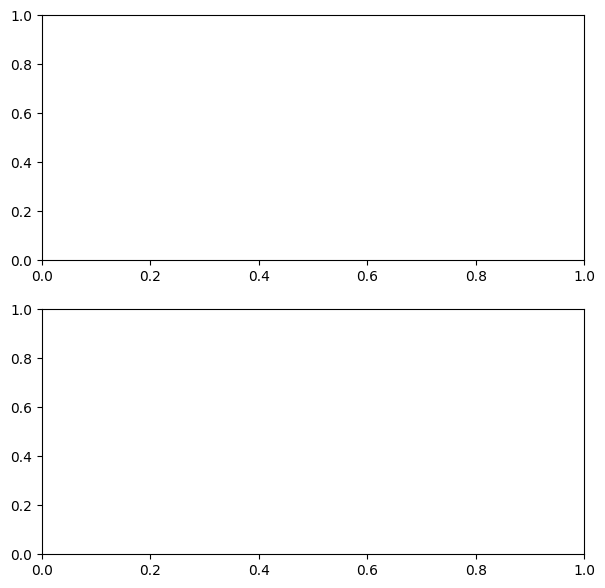

In [78]:
# arr is an array which we can slice/index later on
fig, arr = plt.subplots(
    2,
    1,
    figsize=(7,7),
    sharey=True
)

In [79]:
fig.title = "HELLO"

In [80]:
arr[0].set_title("helo")

Text(0.5, 1.0, 'helo')

In [81]:
arr[0]

<Axes: title={'center': 'helo'}>

In [82]:
arr[0]

<Axes: title={'center': 'helo'}>

In [83]:
arr[1]

<Axes: >

In [84]:
plt.subplots?

Signature:
plt.subplots(
    nrows=1,
    ncols=1,
    *,
    sharex=False,
    sharey=False,
    squeeze=True,
    width_ratios=None,
    height_ratios=None,
    subplot_kw=None,
    gridspec_kw=None,
    **fig_kw,
)
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False or 'none': each subplot x- or y-axis will be independent.
    - 'row': each subplot row will share an x- or y-axis.
    - 'col': each subplot column will share an x- or y-axis.

    When subplots have a shared x-axis along a column, only the x tick
    labels

`fig` - Figure Object (Sometimes will need to interact)

`ax` - Axis Object (Primarily interact with this object)

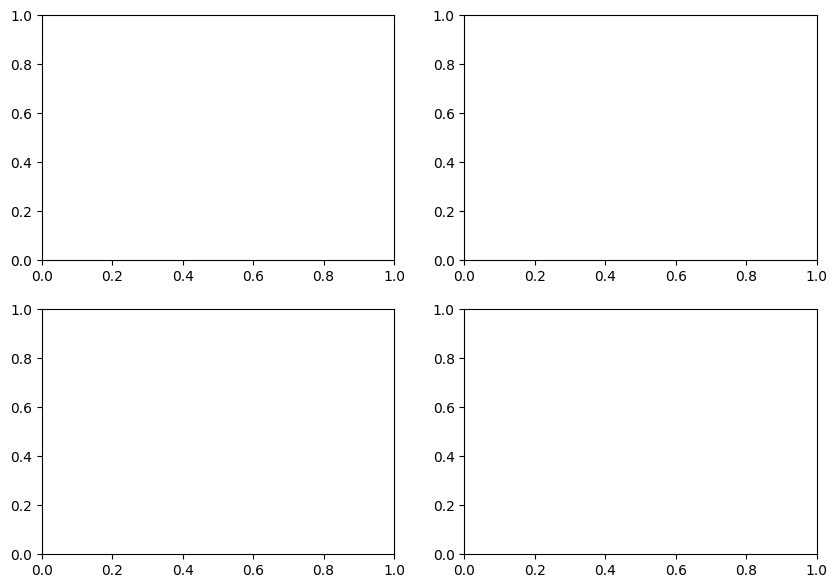

In [93]:
# Tuple Unpacking
# ax is now a 2x2 array, so it must be sliced using ax[n][m]
fig, ax = plt.subplots(2,2, figsize=(10,7))

In [94]:
# Method 1
ax[0][1]

<Axes: >

In [95]:
# Method 2
ax[0,1]

<Axes: >

In [96]:
type(fig)

matplotlib.figure.Figure

In [97]:
type(ax[0])

numpy.ndarray

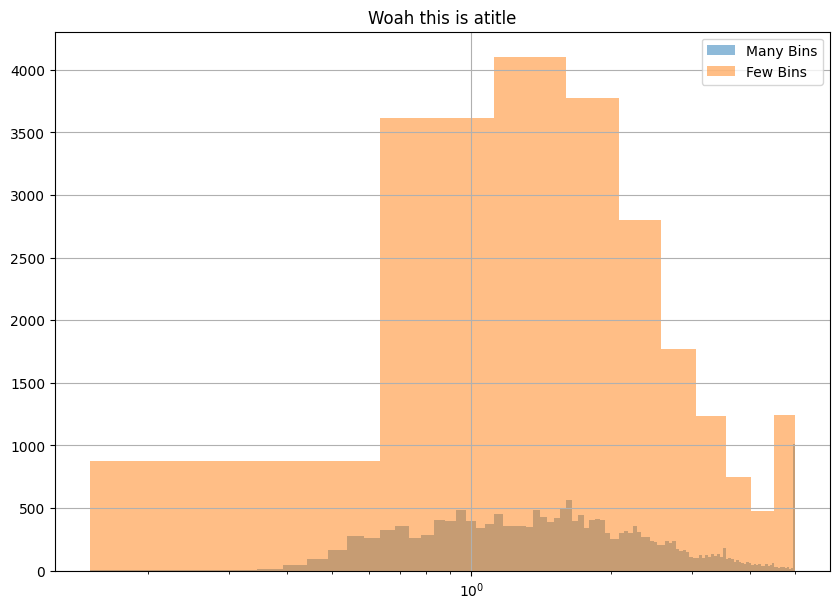

In [102]:
# Defining fig and ax
fig, ax = plt.subplots(1,1, figsize=(10,7))

data_df['MedHouseValue'].hist(
    bins=100,
    ax=ax, # Using the same ax
    label='Many Bins',
    alpha=0.5, # Opacity
)

data_df['MedHouseValue'].hist(
    bins=10,
    ax=ax, # This is key 🔑
    label='Few Bins',
    alpha=0.5,
)

ax.legend() # Enabling Legend
ax.set_title('Woah this is atitle')

# Use this to enable a log xaxis
ax.set_xscale('log')

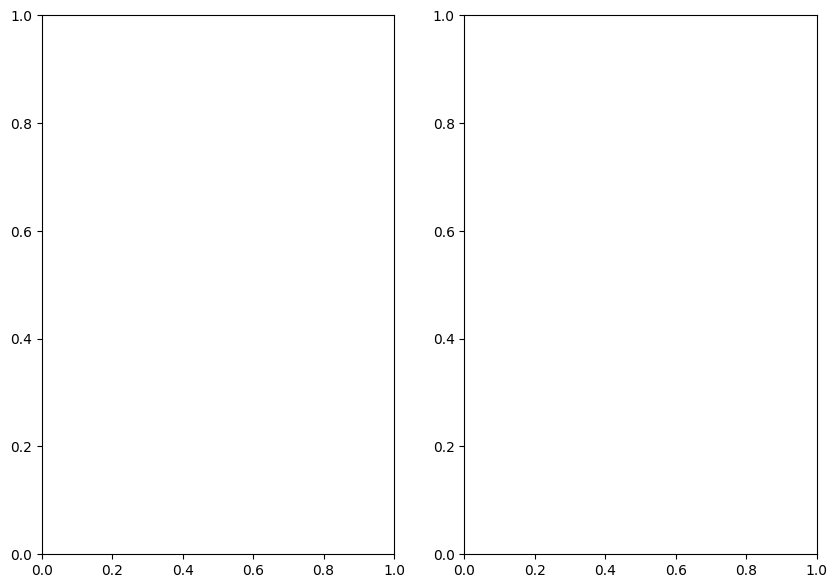

In [103]:
fig, ax = plt.subplots(1,2, figsize=(10,7))


In [104]:
ax

array([<Axes: >, <Axes: >], dtype=object)

Text(0.5, 0.98, 'woah this is a title')

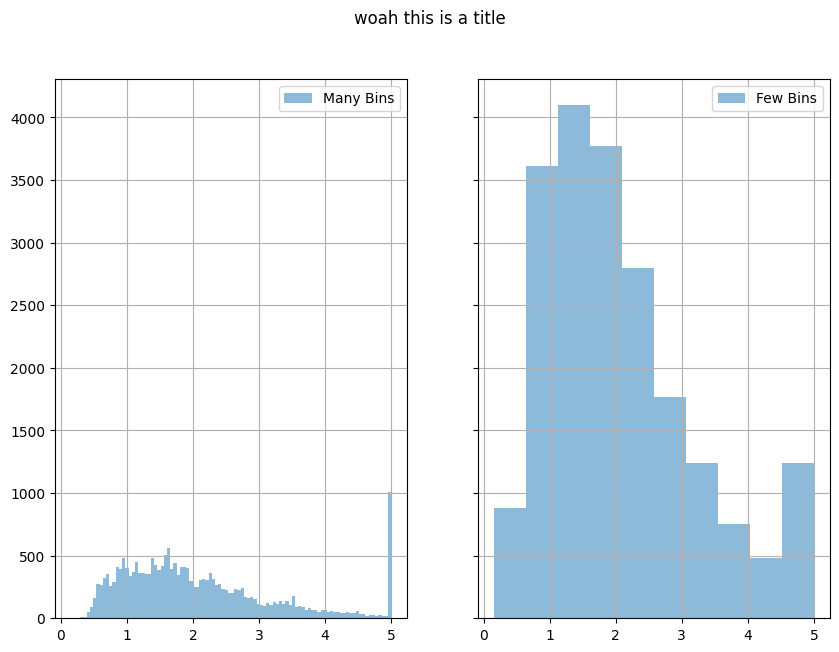

In [105]:
# Defining fig and ax
# Sharey is important!
fig, ax = plt.subplots(1,2, figsize=(10,7), sharey=True)

data_df['MedHouseValue'].hist(
    bins=100,
    ax=ax[0], # Using the same ax
    label='Many Bins',
    alpha=0.5, # Opacity
)

data_df['MedHouseValue'].hist(
    bins=10,
    ax=ax[1], # This is key 🔑
    label='Few Bins',
    alpha=0.5,
)

ax[0].legend() # Enabling Legend on the axis
ax[1].legend() # Enabling Legend on the axis

fig.suptitle('woah this is a title')


In [106]:
# A histogram is essentially a value_counts for a column!
data_df['MedHouseValue'].value_counts()

MedHouseValue
5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: count, Length: 3842, dtype: int64

/Users/bipinaasi/aidi-1100/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of MedHouseValue')

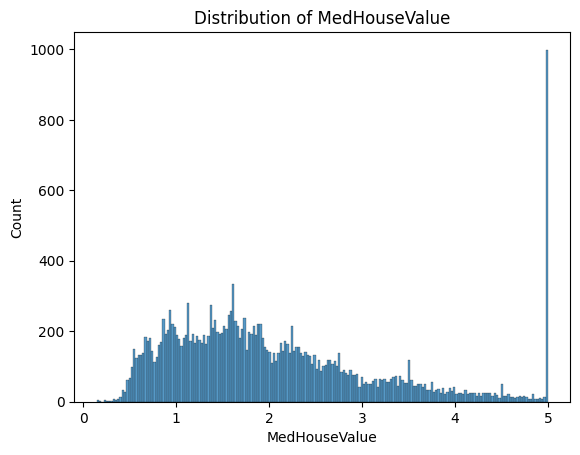

In [107]:
# Exercise 5: Plot the distribution of the target variable 'MedHouseValue' (Median house value).
ax = sns.histplot(
    data_df['MedHouseValue'],
    bins=200
)
ax.set_title('Distribution of MedHouseValue')

In [108]:
ex_df = pd.DataFrame(
    {
    'col1':[1,2,3,4,5,6],
    'col2':[6,5,4,3,2,1],
    'col3':[4.01,4,4,4,4,4],
})

In [109]:
ex_df

,col1,col2,col3
0,1,6,4.01
1,2,5,4.00
2,3,4,4.00
3,4,3,4.00
4,5,2,4.00
5,6,1,4.00


In [110]:
cols = ['col1','col2']
ex_df[cols]

,col1,col2
0,1,6
1,2,5
2,3,4
3,4,3
4,5,2
5,6,1


In [111]:
# This is just a view (does not change in place)
ex_df.iloc[:,[2,1,0]]

,col3,col2,col1
0,4.01,6,1
1,4.00,5,2
2,4.00,4,3
3,4.00,3,4
4,4.00,2,5
5,4.00,1,6


In [112]:
ex_df

,col1,col2,col3
0,1,6,4.01
1,2,5,4.00
2,3,4,4.00
3,4,3,4.00
4,5,2,4.00
5,6,1,4.00


In [113]:
ex_df.loc[:,['col1','col2']]

,col1,col2
0,1,6
1,2,5
2,3,4
3,4,3
4,5,2
5,6,1


In [114]:
ex_df.loc[0,:]

col1    1.00
col2    6.00
col3    4.01
Name: 0, dtype: float64

In [115]:
ex_df

,col1,col2,col3
0,1,6,4.01
1,2,5,4.00
2,3,4,4.00
3,4,3,4.00
4,5,2,4.00
5,6,1,4.00


<Axes: xlabel='col1', ylabel='col1'>

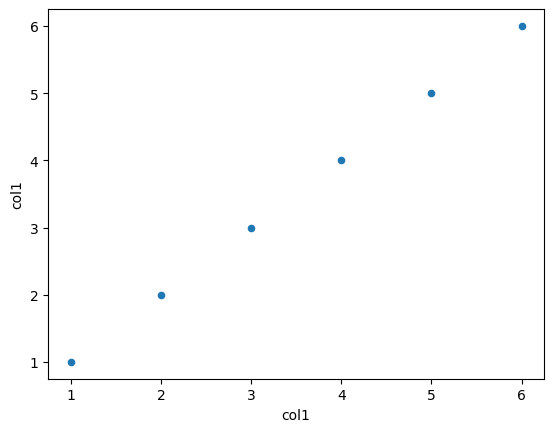

In [117]:
# Strongly positive correlated
ex_df.plot(x='col1',y='col1', kind='scatter')

<Axes: xlabel='col2', ylabel='col2'>

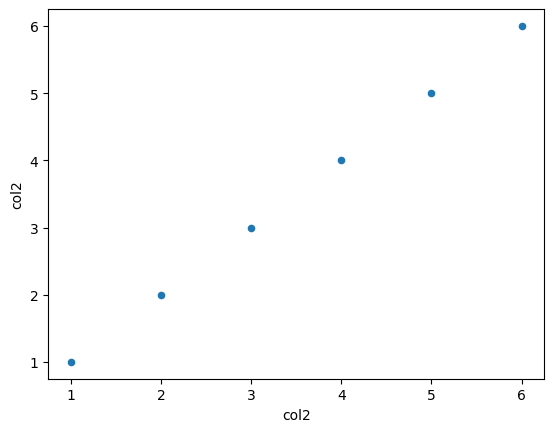

In [118]:
ex_df.plot(x='col2',y='col2', kind='scatter')

In [120]:
# A scatter plot visualized the numerical correlation values between 2 variables
ex_df.corr()

,col1,col2,col3
col1,1.000000,-1.000000,-0.654654
col2,-1.000000,1.000000,0.654654
col3,-0.654654,0.654654,1.000000


### Correlation 
- is your normalized covariance (between -1 to 1)
- how strong is the linear relationship between two variable


### Covariance 
- Comparing how each feature's datapoints deviate from the mean.
- 
  (i.e if both are deviating in a positive direction, it'll be +)

### Partial Correlation
- Google it, it's usually an interview question as well

In [123]:
ex_df.corr().values.T

array([[ 1.        , -1.        , -0.65465367],
       [-1.        ,  1.        ,  0.65465367],
       [-0.65465367,  0.65465367,  1.        ]])

In [124]:
# Transpose
ex_df.corr().T

,col1,col2,col3
col1,1.000000,-1.000000,-0.654654
col2,-1.000000,1.000000,0.654654
col3,-0.654654,0.654654,1.000000


<Axes: xlabel='col2', ylabel='col2'>

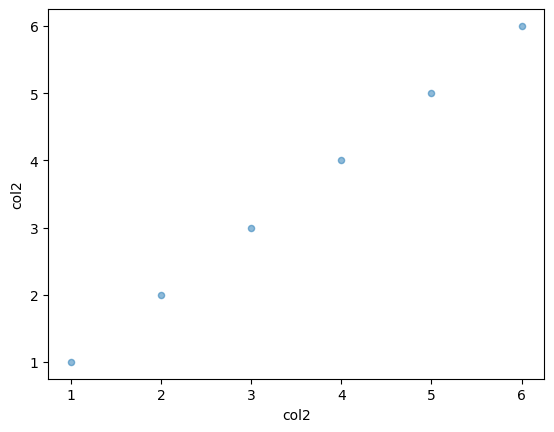

In [125]:
ex_df.plot.scatter(x="col2", y="col2", alpha=0.5)

**As you can see, a numerical correlation values doesn't always represent the distribution!**

You shouldn't solely rely on the numerical value, and you should pair your EDA's with visualizations 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/2880px-Anscombe%27s_quartet_3.svg.png" alt="Alt Text" width="1000">



In [126]:
# pairplots let us visualize the distribution (histogram) and scatter plot (correlation) between variables
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

/Users/bipinaasi/aidi-1100/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bipinaasi/aidi-1100/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bipinaasi/aidi-1100/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


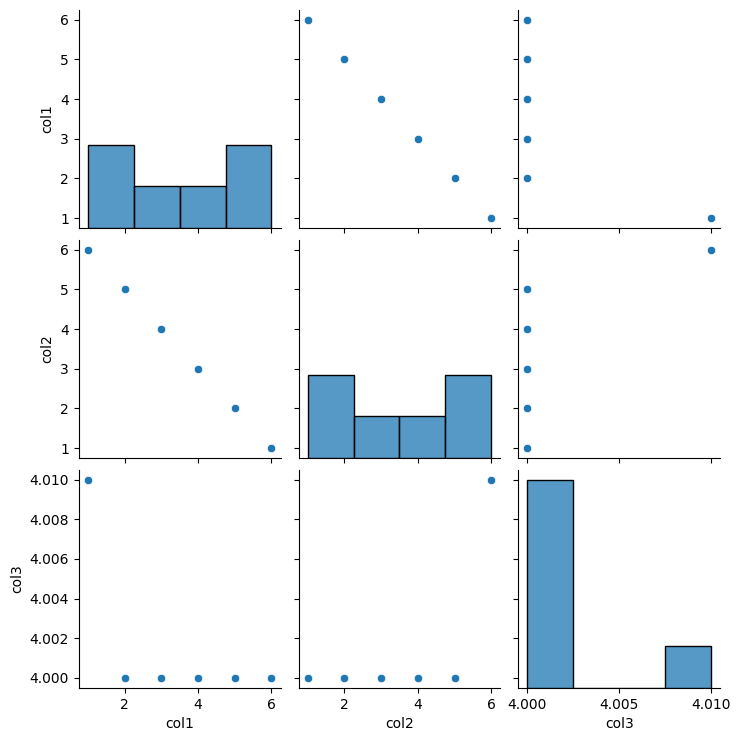

In [127]:
# Cutsey 
# Mindfull
# Demure

sns.pairplot(ex_df)

In [128]:
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [129]:
# Transpose
data_df.T

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
MedInc,8.325200,8.301400,7.257400,5.643100,3.846200,4.036800,3.659100,3.120000,2.080400,3.691200,...,3.567300,3.517900,3.125000,2.549500,3.712500,1.560300,2.556800,1.700000,1.867200,2.388600
HouseAge,41.000000,21.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,42.000000,52.000000,...,11.000000,15.000000,15.000000,27.000000,28.000000,25.000000,18.000000,17.000000,18.000000,16.000000
AveRooms,6.984127,6.238137,8.288136,5.817352,6.281853,4.761658,4.931907,4.797527,4.294118,4.970588,...,5.932584,6.145833,6.023377,5.445026,6.779070,5.045455,6.114035,5.205543,5.329513,5.254717
AveBedrms,1.023810,0.971880,1.073446,1.073059,1.081081,1.103627,0.951362,1.061824,1.117647,0.990196,...,1.134831,1.141204,1.080519,1.078534,1.148256,1.133333,1.315789,1.120092,1.171920,1.162264
Population,322.000000,2401.000000,496.000000,558.000000,565.000000,413.000000,1094.000000,1157.000000,1206.000000,1551.000000,...,1257.000000,1200.000000,1047.000000,1082.000000,1041.000000,845.000000,356.000000,1007.000000,741.000000,1387.000000
AveOccup,2.555556,2.109842,2.802260,2.547945,2.181467,2.139896,2.128405,1.788253,2.026891,2.172269,...,2.824719,2.777778,2.719481,2.832461,3.026163,2.560606,3.122807,2.325635,2.123209,2.616981
Latitude,37.880000,37.860000,37.850000,37.850000,37.850000,37.850000,37.840000,37.840000,37.840000,37.840000,...,39.290000,39.330000,39.260000,39.190000,39.270000,39.480000,39.490000,39.430000,39.430000,39.370000
Longitude,-122.230000,-122.220000,-122.240000,-122.250000,-122.250000,-122.250000,-122.250000,-122.250000,-122.260000,-122.250000,...,-121.320000,-121.400000,-121.450000,-121.530000,-121.560000,-121.090000,-121.210000,-121.220000,-121.320000,-121.240000
MedHouseValue,4.526000,3.585000,3.521000,3.413000,3.422000,2.697000,2.992000,2.414000,2.267000,2.611000,...,1.120000,1.072000,1.156000,0.983000,1.168000,0.781000,0.771000,0.923000,0.847000,0.894000


In [130]:
ex_df.corr()

,col1,col2,col3
col1,1.000000,-1.000000,-0.654654
col2,-1.000000,1.000000,0.654654
col3,-0.654654,0.654654,1.000000


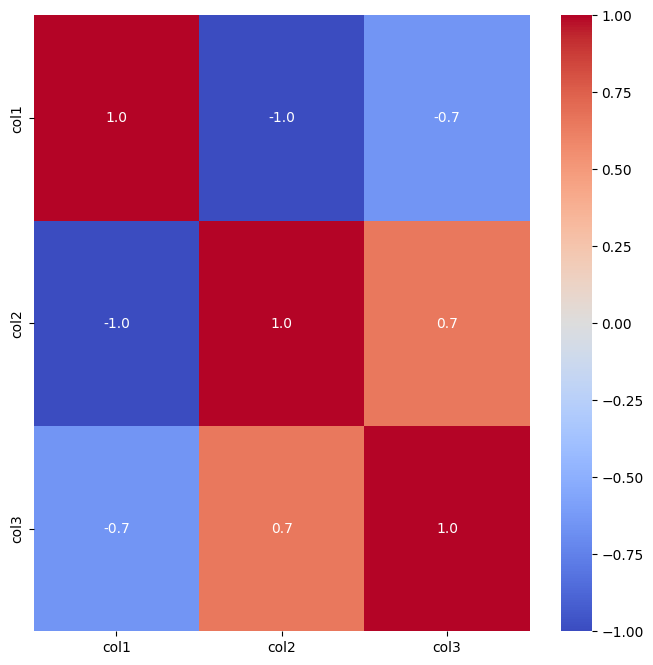

In [132]:
# Exercise 6: Create a correlation matrix heatmap for the dataset.

# This is really just visualization on the `ex_df.corr()` dataframe above
plt.figure(figsize=(8, 8))
sns.heatmap(ex_df.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [133]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [135]:
# Exercise: Get top 3 most correlated features to MedHouseValue (Magnitude)
data_df.corr()['MedHouseValue'].abs().sort_values().iloc[-3:].index

Index(['AveRooms', 'MedInc', 'MedHouseValue'], dtype='object')

In [136]:
data_df.corr()['MedHouseValue'].abs().sort_values()

AveOccup         0.023737
Population       0.024650
Longitude        0.045967
AveBedrms        0.046701
HouseAge         0.105623
Latitude         0.144160
AveRooms         0.151948
MedInc           0.688075
MedHouseValue    1.000000
Name: MedHouseValue, dtype: float64

In [137]:
# Exercise: Get top 3 most correlated features to MedHouseValue
data_df.corr()['MedHouseValue'].sort_values(ascending=False)

MedHouseValue    1.000000
MedInc           0.688075
AveRooms         0.151948
HouseAge         0.105623
AveOccup        -0.023737
Population      -0.024650
Longitude       -0.045967
AveBedrms       -0.046701
Latitude        -0.144160
Name: MedHouseValue, dtype: float64

In [138]:
data_df.corr()['MedHouseValue'].sort_values(ascending=False).index[:3]

Index(['MedHouseValue', 'MedInc', 'AveRooms'], dtype='object')

In [139]:
# Exercise: Strongest magnitude to MedHouseValue
# NOTE: ORDER IS IMPORTANT
data_df.corr()['MedHouseValue'].abs().sort_values(ascending=False).index[:3]

Index(['MedHouseValue', 'MedInc', 'AveRooms'], dtype='object')

In [140]:
# Comma is only used for 2 dimensional objects
data_df.corr().iloc[:,:3]

,MedInc,HouseAge,AveRooms
MedInc,1.000000,-0.119034,0.326895
HouseAge,-0.119034,1.000000,-0.153277
AveRooms,0.326895,-0.153277,1.000000
AveBedrms,-0.062040,-0.077747,0.847621
Population,0.004834,-0.296244,-0.072213
AveOccup,0.018766,0.013191,-0.004852
Latitude,-0.079809,0.011173,0.106389
Longitude,-0.015176,-0.108197,-0.027540
MedHouseValue,0.688075,0.105623,0.151948


In [141]:
# Exercise 7: Identify the top 3 features that have the highest positive correlation with 'MedHouseValue'.

correlations = data_df.corr()['MedHouseValue'].sort_values(ascending=False)
top_3_features = correlations.index[1:4]
print("Top 3 features positively correlated with MedHouseValue:", top_3_features.tolist())

Top 3 features positively correlated with MedHouseValue: ['MedInc', 'AveRooms', 'HouseAge']


In [142]:
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [143]:
# Very mindfull
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [144]:
# Very mindfull
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [145]:
import seaborn as sns
import pandas as pd


In [146]:
titanic_df = sns.load_dataset('titanic')


In [152]:
# This is a mask, that is used to filter! 
# Print the value and see what it contains
m = [ True for i in range(titanic_df.shape[0])]

In [153]:
titanic_df[m]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [158]:
# If i set the first index as 0
m[1] = False
# Then the first row is not returned when i apply the mask
titanic_df[m]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [161]:
# Another example of a mask
a = titanic_df['embark_town'] != 'Southampton' 

In [162]:
titanic_df[a]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [163]:
b = titanic_df['class'] == 'First'

In [164]:
# Why won't this work?
a and b

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [165]:
# AND Operator
b & a

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889     True
890    False
Length: 891, dtype: bool

In [166]:
# OR Operator
b | a

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890     True
Length: 891, dtype: bool

In [167]:
# Use BRACKETS 
m = ( (titanic_df['embark_town'] != 'Southampton') & (titanic_df['class'] == 'First') )

In [168]:
titanic_df[m]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,male,NaN,0,0,29.7000,C,First,man,True,C,Cherbourg,yes,True
842,1,1,female,30.0,0,0,31.0000,C,First,woman,False,NaN,Cherbourg,yes,True
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [169]:
# Use BRACKETS 
m1 = titanic_df['embark_town'] != 'Southampton'
m2 = titanic_df['class'] == 'First'

In [170]:
m1 | m2

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890     True
Length: 891, dtype: bool

In [171]:
# Creates a new index
titanic_df[m1 | m2].reset_index(drop=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
3,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
4,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
370,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
371,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
372,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [172]:
# Get unique values of column
titanic_df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [173]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [174]:
titanic_df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: >

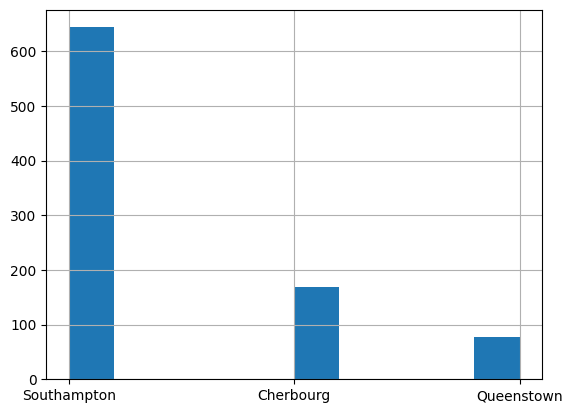

In [175]:
titanic_df['embark_town'].hist()

In [176]:
# Sometimes you need to use one hot encoding!
pd.get_dummies(titanic_df['embark_town'])

,Cherbourg,Queenstown,Southampton
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [178]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Other times you need to encode it using a LabelEncoder
pd.Series(le.fit_transform(titanic_df['embark_town']))

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int64

In [179]:
# How is the LabelEncoder different from  one hot encoding?

In [180]:
titanic_df['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

## Does calculating error on the data make sense?

Error between Cherbourg	 and Queenstown when it's LabelEncoded makes ZERO sense

In [185]:
# These are series level operations
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch']
titanic_df['family_size']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: family_size, Length: 891, dtype: int64

In [186]:
# Drop the columns Method 1
titanic_df.drop('age',axis=1)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [187]:
# Drop the columns, Method 2 (I prefer this, requires less thinking for the reader)
titanic_df.drop(columns = 'age')

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [188]:
# Rename columns
# NOTE: DOES NOT CHANGE IN PLACE
titanic_df.rename(columns={'who':'whom'})

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,whom,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [189]:
# Change the data type 
titanic_df['who']

0        man
1      woman
2      woman
3      woman
4        man
       ...  
886      man
887    woman
888    woman
889      man
890      man
Name: who, Length: 891, dtype: object

In [190]:
titanic_df['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [191]:
# How to deal with N/A ? 
titanic_df['age'].isnull().sum()

177

In [192]:
# Drop all rows where age is NA  
# NOTE: `~`
m = titanic_df['age'].isna()
titanic_df[~m]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,5
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [193]:
# Drop all rows where age is NA 
# Method 2
titanic_df_new = titanic_df.dropna(subset='age')

In [194]:
titanic_df_new['age'].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
885    39
886    27
887    19
889    26
890    32
Name: age, Length: 714, dtype: int64

Exercise 1: Identify columns with missing values and calculate the percentage of missing values for each.

Before doing it programmatically do it manually.

- Step 1: Get missing values (isna or isnull)
- Step 2: Aggregate total per columns (sum)
- Step 3: Normalize by the total rows

In [195]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [196]:
# Count of na per column / total rows per column
titanic_df.isna().sum() / 891

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
family_size    0.000000
dtype: float64

In [197]:
# Method 1:
titanic_df.isna().sum() / titanic_df.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
family_size    0.000000
dtype: float64

In [198]:
titanic_df.isna().sum().value_counts('normalize')

0      0.7500
2      0.1250
177    0.0625
688    0.0625
Name: proportion, dtype: float64

In [199]:
# Exercise 1: Identify columns with missing values and calculate the percentage of missing values for each.
t_df = titanic_df.isna().sum() / titanic_df.shape[0]
t_df.round(4)

survived       0.0000
pclass         0.0000
sex            0.0000
age            0.1987
sibsp          0.0000
parch          0.0000
fare           0.0000
embarked       0.0022
class          0.0000
who            0.0000
adult_male     0.0000
deck           0.7722
embark_town    0.0022
alive          0.0000
alone          0.0000
family_size    0.0000
dtype: float64

In [200]:
# Exercise 2: Fill missing 'age' values with the median age grouped by 'sex' and 'pclass'.
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [201]:
titanic_df = sns.load_dataset('titanic')


In [202]:
# Exercise 3: Replace missing values in 'embarked' with the mode of the column.
titanic_df['embarked'].value_counts(dropna=False)

embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [209]:
embarked_mode = titanic_df['embarked'].mode()
embarked_mode

0    S
Name: embarked, dtype: object

In [210]:
# Important that the type is str
titanic_df['embarked'] = titanic_df['embarked'].fillna(embarked_mode.iloc[0])

In [211]:
titanic_df['embarked'].value_counts(dropna=False)

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1024px-Boxplot_vs_PDF.svg.png" alt="Alt Text" width="500">





In [212]:
pd.DataFrame.hist?

Signature:
pd.DataFrame.hist(
    data: 'DataFrame',
    column: 'IndexLabel | None' = None,
    by=None,
    grid: 'bool' = True,
    xlabelsize: 'int | None' = None,
    xrot: 'float | None' = None,
    ylabelsize: 'int | None' = None,
    yrot: 'float | None' = None,
    ax=None,
    sharex: 'bool' = False,
    sharey: 'bool' = False,
    figsize: 'tuple[int, int] | None' = None,
    layout: 'tuple[int, int] | None' = None,
    bins: 'int | Sequence[int]' = 10,
    backend: 'str | None' = None,
    legend: 'bool' = False,
    **kwargs,
)
Docstring:
Make a histogram of the DataFrame's columns.

A `histogram`_ is a representation of the distribution of data.
This function calls :meth:`matplotlib.pyplot.hist`, on each series in
the DataFrame, resulting in one histogram per column.

.. _histogram: https://en.wikipedia.org/wiki/Histogram

Parameters
----------
data : DataFrame
    The pandas object holding the data.
column : str or sequence, optional
    If passed, will be used to limit 

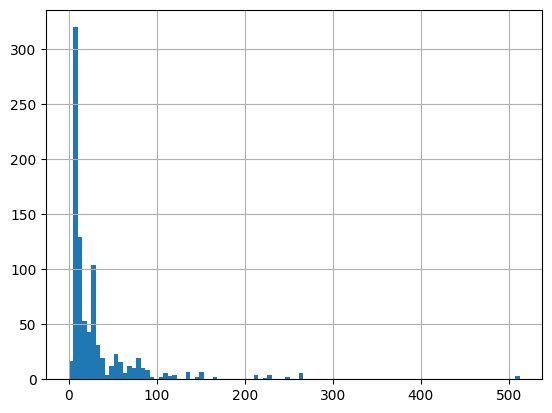

In [213]:
ax = titanic_df['fare'].hist(bins=100)

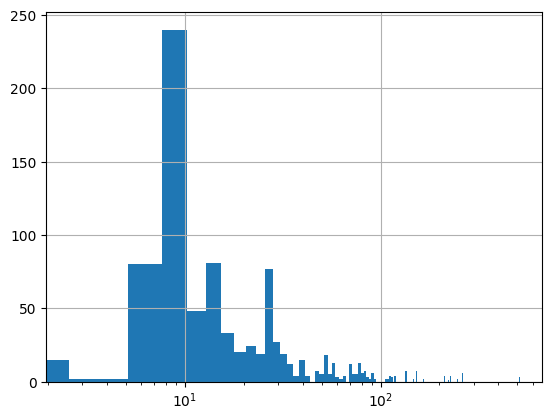

In [214]:
# Using log as your xscale (use log or symlog if you have negative values)
ax = titanic_df['fare'].hist(bins=200)
ax.set_xscale('log')

In [215]:
# Exercise 4: Detect and remove outliers in the 'fare' column using the Interquartile Range (IQR) method.

titanic_df_inliers = titanic_df.copy()

Q1 = titanic_df_inliers['fare'].quantile(0.25)
Q3 = titanic_df_inliers['fare'].quantile(0.75)
IQR = Q3 - Q1

cond1 = titanic_df_inliers['fare'] < (Q1 - 1.5 * IQR)
cond2 = titanic_df_inliers['fare'] > (Q3 + 1.5 * IQR)
m = ~( cond1 | cond2 )

titanic_df_inliers = titanic_df_inliers[m]

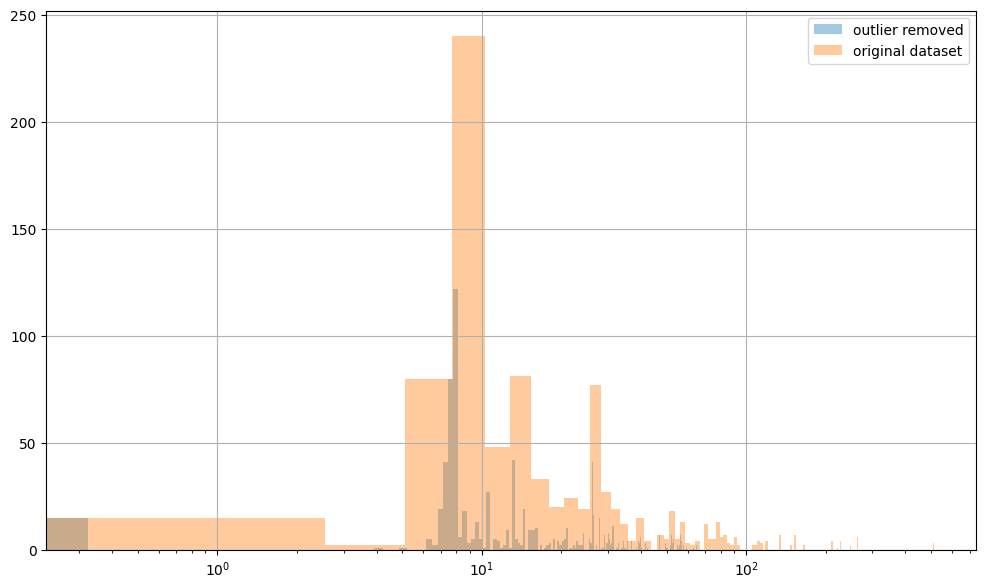

In [216]:
fig, ax = plt.subplots(1,1, figsize=(12,7))


ax = titanic_df_inliers['fare'].hist(
    bins=200,
    ax=ax,
    alpha=0.4,
    label='outlier removed'
)

ax = titanic_df['fare'].hist(
    bins=200,
    ax=ax,
    alpha=0.4,
    label='original dataset'
)
ax.set_xscale('log')

ax.legend()

Text(0.5, 0.98, 'Outlier Removed Comparison')

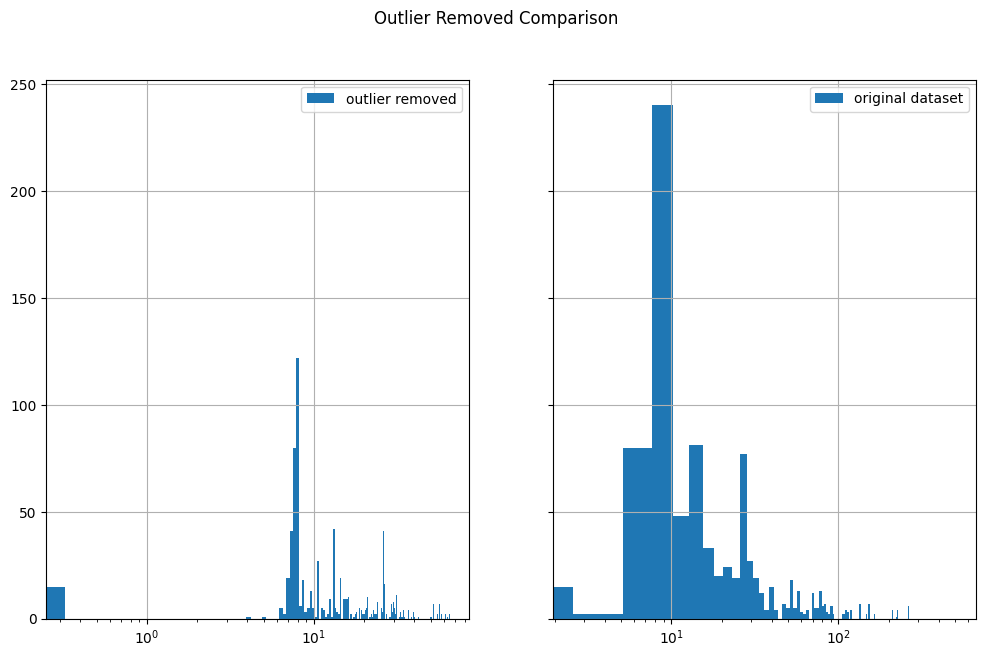

In [217]:
fig, ax = plt.subplots(1,2, figsize=(12,7), sharey=True)


titanic_df_inliers['fare'].hist(
    bins=200,
    ax=ax[0],
    label='outlier removed'
)

titanic_df['fare'].hist(
    bins=200,
    ax=ax[1],
    label='original dataset'
)
ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].legend()
ax[1].legend()

fig.suptitle('Outlier Removed Comparison')

In [218]:
# Exercise 7: Remove duplicate rows in the dataset.

In [219]:
# Exercise 8: Verify that there are no remaining missing values in the dataset.

# Data Reshaping


In [220]:
import pandas as pd

# Sample data
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'SubCategory': ['X', 'X', 'Y', 'Y', 'X', 'Y'],
    'Value': [10, 15, 10, 20, 15, 25]
}

df = pd.DataFrame(data)


In [221]:
df

,Category,SubCategory,Value
0,A,X,10
1,B,X,15
2,A,Y,10
3,B,Y,20
4,A,X,15
5,B,Y,25


In [222]:
grouped = df.groupby(['Category', 'SubCategory'])
grouped

In [223]:
# Iterate over the GroupBy object
for group, data in grouped:
    print(f"Group: {group}")
    print(data)
    print("-" * 40)

# filters for the unique combinations of the values ['Category', 'SubCategory']

Group: ('A', 'X')
  Category SubCategory  Value
0        A           X     10
4        A           X     15
----------------------------------------
Group: ('A', 'Y')
  Category SubCategory  Value
2        A           Y     10
----------------------------------------
Group: ('B', 'X')
  Category SubCategory  Value
1        B           X     15
----------------------------------------
Group: ('B', 'Y')
  Category SubCategory  Value
3        B           Y     20
5        B           Y     25
----------------------------------------


In [224]:
# Iterate over the GroupBy object
for group, data in grouped:
    print(f"Group: {group}")
    print(data.sum())
    print("-" * 40)

# filters for the unique combinations of the values ['Category', 'SubCategory']

Group: ('A', 'X')
Category       AA
SubCategory    XX
Value          25
dtype: object
----------------------------------------
Group: ('A', 'Y')
Category        A
SubCategory     Y
Value          10
dtype: object
----------------------------------------
Group: ('B', 'X')
Category        B
SubCategory     X
Value          15
dtype: object
----------------------------------------
Group: ('B', 'Y')
Category       BB
SubCategory    YY
Value          45
dtype: object
----------------------------------------


In [225]:
df

,Category,SubCategory,Value
0,A,X,10
1,B,X,15
2,A,Y,10
3,B,Y,20
4,A,X,15
5,B,Y,25


In [226]:
grouped = df.groupby(['Category', 'SubCategory']).agg(
    sum_value = ('Value','sum')
)
grouped

sum_value
Category SubCategory           
A        X                   25
         Y                   10
B        X                   15
         Y                   45

In [227]:
grouped = df.groupby(['Category', 'SubCategory']).agg(
    {'Value':['sum','max']}
)
grouped

Value    
                       sum max
Category SubCategory          
A        X              25  15
         Y              10  10
B        X              15  15
         Y              45  25

In [228]:
# Assume we have stock data for two companies
dates = pd.date_range('2020-01-01', periods=100)
stock_a = pd.DataFrame({'Price': np.random.rand(100).cumsum()}, index=dates)
stock_b = pd.DataFrame({'Price': np.random.rand(80).cumsum()}, index=dates[:80])

In [232]:
# Converts to datetime object for resampling
pd.to_datetime?

Signature:
pd.to_datetime(
    arg: 'DatetimeScalarOrArrayConvertible | DictConvertible',
    errors: 'DateTimeErrorChoices' = 'raise',
    dayfirst: 'bool' = False,
    yearfirst: 'bool' = False,
    utc: 'bool' = False,
    format: 'str | None' = None,
    exact: 'bool | lib.NoDefault' = <no_default>,
    unit: 'str | None' = None,
    infer_datetime_format: 'lib.NoDefault | bool' = <no_default>,
    origin: 'str' = 'unix',
    cache: 'bool' = True,
) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
Docstring:
Convert argument to datetime.

This function converts a scalar, array-like, :class:`Series` or
:class:`DataFrame`/dict-like to a pandas datetime object.

Parameters
----------
arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
    The object to convert to a datetime. If a :class:`DataFrame` is provided, the
    method expects minimally the following columns: :const:`"year"`,
    :const:`"month"`, :const:`"day"`. The column "year"
 

In [233]:
# One corect way
# Works if your index a Datetime object
stock_a.resample(rule='ME').agg(
    {'Price':'sum'}
)

,Price
2020-01-31,228.820235
2020-02-29,664.958910
2020-03-31,1210.313101
2020-04-30,453.705692


In [234]:
# One which I like
stock_a.resample(rule='ME').agg(
    monthly_sum_price = ('Price', 'sum')
)

,monthly_sum_price
2020-01-31,228.820235
2020-02-29,664.958910
2020-03-31,1210.313101
2020-04-30,453.705692


In [235]:
# Deduct marks in your assignment
stock_a.resample(rule='ME').sum()
# What is this behaviour

,Price
2020-01-31,228.820235
2020-02-29,664.958910
2020-03-31,1210.313101
2020-04-30,453.705692


In [236]:
grouped = df.groupby(['Category', 'SubCategory']).agg(
    {'Value':'sum'}
)
grouped

Value
Category SubCategory       
A        X               25
         Y               10
B        X               15
         Y               45

In [237]:
# When you use pivot_table with only index. It is the SAME as a groupby
df.pivot_table(
    values='Value',
    index=['Category', 'SubCategory'], # What is being grouped
    aggfunc='sum'
)

Value
Category SubCategory       
A        X               25
         Y               10
B        X               15
         Y               45

In [238]:
# When you use pivot_table with index and columns, you are going beyond a groupby
# Returns a grouped matrix
df.pivot_table(
    values='Value', 
    index='Category', # What is being grouped 
    columns='SubCategory', # What is being grouped
    aggfunc='sum', 
    fill_value=0
)

SubCategory,X,Y
Category,,
A,25,10
B,15,45


**Why is reshaping important**
- Data Schema constraints set by plotting functions 
- Reporting
- Pivot tables and group by operations help you create aggregate values which are useful features (Preliminary Feature Engineering)

In [239]:
df.pivot_table(
    values='Value',
    index='Category',
    columns='SubCategory',
    aggfunc=['sum', 'mean'],
    fill_value=0
)

sum      mean      
SubCategory   X   Y     X     Y
Category                       
A            25  10  12.5  10.0
B            15  45  15.0  22.5

In [240]:
df.groupby(['Category','SubCategory']).agg(
    {'Value': ['sum', 'mean']}
)

Value      
                       sum  mean
Category SubCategory            
A        X              25  12.5
         Y              10  10.0
B        X              15  15.0
         Y              45  22.5

In [241]:
# melt turns columns into rows, creating two new columns: one for the variable name and one for the value.

In [242]:
pivot = df.pivot_table(values='Value', index='Category', columns='SubCategory', aggfunc='sum', fill_value=0)
pivot

SubCategory,X,Y
Category,,
A,25,10
B,15,45


In [243]:
pivot.reset_index()

SubCategory,Category,X,Y
0,A,25,10
1,B,15,45


In [244]:
pivot.reset_index().melt(
    id_vars='Category', 
    value_vars=['X', 'Y'], 
    var_name='SubCategory', 
    value_name='Value'
)


,Category,SubCategory,Value
0,A,X,25
1,B,X,15
2,A,Y,10
3,B,Y,45


**`Melt` is the reversal of `groupby` and `pivot` operations**

- stack 
- unstack

In [245]:
# 7. Reindexing and Alignment

# Using the Stock Prices dataset:

import pandas as pd
import numpy as np

# Assume we have stock data for two companies
dates = pd.date_range('2020-01-01', periods=100)
stock_a = pd.DataFrame({'Price': np.random.rand(100).cumsum()}, index=dates)
stock_b = pd.DataFrame({'Price': np.random.rand(80).cumsum()}, index=dates[:80])

In [246]:
stock_a

,Price
2020-01-01,0.456386
2020-01-02,1.016438
2020-01-03,1.538516
2020-01-04,2.462079
2020-01-05,2.962423
...,...
2020-04-05,44.025809
2020-04-06,44.965495
2020-04-07,45.504758
2020-04-08,46.164322


In [247]:
stock_a.index[0]

Timestamp('2020-01-01 00:00:00')

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

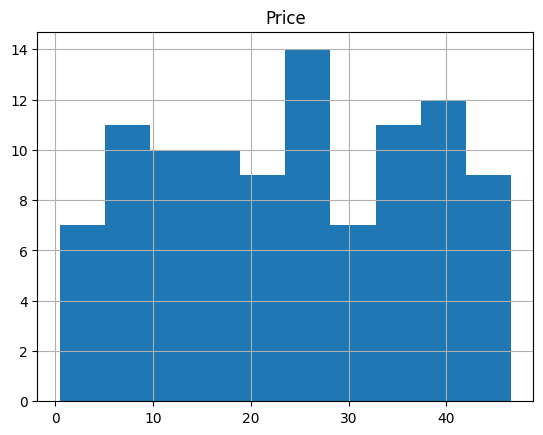

In [248]:
stock_a.hist()

<Axes: >

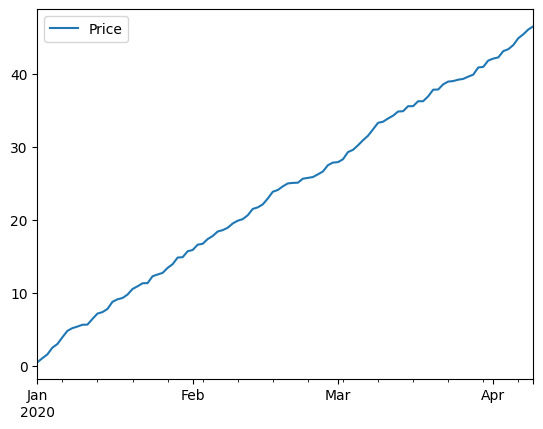

In [249]:
stock_a.plot()

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

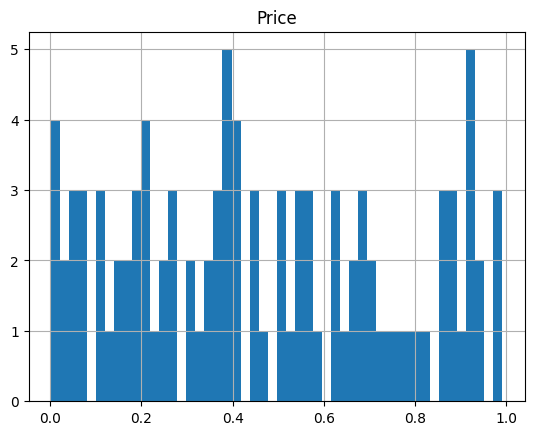

In [250]:
stock_a.diff().hist(bins=50)

**Training model on entire data set? Bad or good?**
- Only after you've validated: 
    1. Data Drift between production and dataset is minimal/0
    2. Model is well generalizable in the dataset your trained/tested on 

<Axes: >

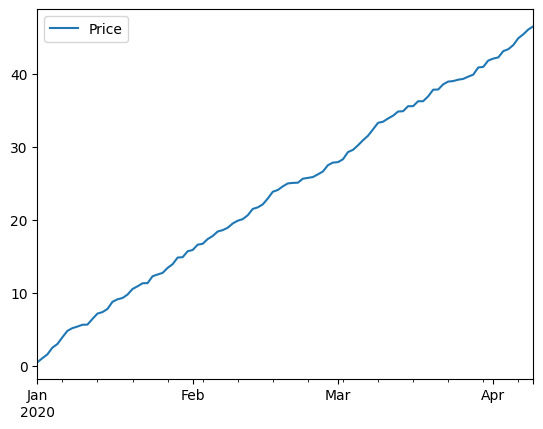

In [251]:
stock_a.plot()

In [252]:
stock_b

,Price
2020-01-01,0.646880
2020-01-02,1.329362
2020-01-03,2.047574
2020-01-04,2.154576
2020-01-05,2.472430
...,...
2020-03-16,36.284252
2020-03-17,37.269337
2020-03-18,38.079817
2020-03-19,38.208437


In [253]:
import statsmodels.api as sm


In [254]:
stock_a.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
      

In [255]:
# Fill in missing days
stock_b.reindex(stock_a.index)

,Price
2020-01-01,0.646880
2020-01-02,1.329362
2020-01-03,2.047574
2020-01-04,2.154576
2020-01-05,2.472430
...,...
2020-04-05,NaN
2020-04-06,NaN
2020-04-07,NaN
2020-04-08,NaN


In [256]:
# Take a monthly sum of stock_b
# I will remove marks from your assignment
stock_b.resample('ME').sum()

,Price
2020-01-31,243.109936
2020-02-29,637.586377
2020-03-31,671.078948


In [257]:
# Take a monthly sum of stock_b
stock_b.resample('ME').agg(
    monthly_sum = ('Price', 'sum')
)

,monthly_sum
2020-01-31,243.109936
2020-02-29,637.586377
2020-03-31,671.078948


In [258]:
# Take a monthly sum of stock_b
stock_b.resample('ME').agg(
    {'Price':'sum'}
)

,Price
2020-01-31,243.109936
2020-02-29,637.586377
2020-03-31,671.078948


## Querying

In [259]:
! pip install -q jupysql duckdb-engine duckdb


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [114]:
import pandas as pd
import duckdb


In [261]:
# Sample DataFrame 1: Customers
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'david@example.com']
})

# Sample DataFrame 2: Orders
orders = pd.DataFrame({
    'order_id': [101, 102, 103, 104],
    'customer_id': [1, 2, 2, 5],
    'product': ['Book', 'Pen', 'Notebook', 'Pencil'],
    'quantity': [2, 5, 3, 4]
})



In [262]:
orders

,order_id,customer_id,product,quantity
0,101,1,Book,2
1,102,2,Pen,5
2,103,2,Notebook,3
3,104,5,Pencil,4


In [263]:
customers

,customer_id,name,email
0,1,Alice,alice@example.com
1,2,Bob,bob@example.com
2,3,Charlie,charlie@example.com
3,4,David,david@example.com


In [264]:
duckdb.connect?

Docstring:
connect(database: object = ':memory:', read_only: bool = False, config: dict = None) -> duckdb.DuckDBPyConnection

Create a DuckDB database instance. Can take a database file name to read/write persistent data and a read_only flag if no changes are desired
Type:      builtin_function_or_method

In [265]:
conn = duckdb.connect(database=':memory:')

In [266]:
# Register DataFrames as DuckDB tables
conn.register('customers', customers)
conn.register('orders', orders)


## SQL - Structured Querying Language

### Why 
- Hardware and underlying code optimizes for Read, Write and More operations




In [267]:
orders

,order_id,customer_id,product,quantity
0,101,1,Book,2
1,102,2,Pen,5
2,103,2,Notebook,3
3,104,5,Pencil,4


In [268]:
orders.max().order_id

104

In [269]:
query = """
SELECT MAX(order_id) as max_order_id
FROM ORDERS as O

"""

result = conn.execute(query).fetchdf()
result

,max_order_id
0,104


```sql
FROM <database>.<schema>.<table>
```

#TODO: Come back to this in more detail

#TODO: Materialized Views vs Regular Persistence of Tables

#TODO: How do SQL queries run under the hood. Optimizing queries 
 - Indexing
 - Clustering
 - Optimize your queries 


# Gather interview questions

Data Warehouse has many databases (Data warehouse isn't always needed)
databases have many schemas 
schemas have tables

In [270]:
query = """
    SELECT *
    FROM ORDERS
    WHERE customer_id = 2
"""

result = conn.execute(query).fetchdf()
result

,order_id,customer_id,product,quantity
0,102,2,Pen,5
1,103,2,Notebook,3


In [272]:
# Common Table Expression 
query = """
WITH T as (
    SELECT *
    FROM ORDERS
    WHERE customer_id = 2
)
SELECT *
FROM T
"""
result = conn.execute(query).fetchdf()
print(result)

   order_id  customer_id   product  quantity
0       102            2       Pen         5
1       103            2  Notebook         3


In [273]:
# Common Table Expression 
query = """
-- Temporary Table named 'cust'
WITH cust AS (
    SELECT *
    FROM ORDERS
    WHERE customer_id = 2
)
select max(quantity) AS max_quantity  -- AS renames/references
FROM cust
"""
result = conn.execute(query).fetchdf()
print(result)

   max_quantity
0             5


In [274]:
# Sub Query
query = """
select max(quantity) as max_quantity
FROM (
    SELECT *
    FROM ORDERS
    WHERE customer_id = 2
)
"""
result = conn.execute(query).fetchdf()
print(result)

   max_quantity
0             5


In [275]:
# How to return the row with the max quantity
query = """
SELECT *
FROM ORDERS
order by quantity DESC
limit 1
"""
result = conn.execute(query).fetchdf()
print(result)

   order_id  customer_id product  quantity
0       102            2     Pen         5


In [276]:
# Return the row with the highest quantity 
query = """
SELECT max(quantity) as max_quantity
FROM orders
"""
result = conn.execute(query).fetchdf()
result

,max_quantity
0,5


In [277]:
# Sub Query

query = """
WITH T as (
    SELECT max(quantity) as max_quantity
    FROM orders
)
SELECT *
FROM orders
WHERE quantity = (SELECT max_quantity FROM t)
"""
result = conn.execute(query).fetchdf()
print(result)

   order_id  customer_id product  quantity
0       102            2     Pen         5


In [278]:
# Interview question usually. Second highest quantity.
query = """
    select *
        , row_number() over (order by quantity desc) as row_num
    from orders
"""
result = conn.execute(query).fetchdf()
print(result)

   order_id  customer_id   product  quantity  row_num
0       102            2       Pen         5        1
1       104            5    Pencil         4        2
2       103            2  Notebook         3        3
3       101            1      Book         2        4


In [279]:
# Interview question usually. Second highest quantity.
query = """
with T AS (
    select *
        , row_number() over (order by quantity desc) as row_num
    from orders
)
select * 
from T 
"""
result = conn.execute(query).fetchdf()
print(result)

   order_id  customer_id   product  quantity  row_num
0       102            2       Pen         5        1
1       104            5    Pencil         4        2
2       103            2  Notebook         3        3
3       101            1      Book         2        4



<img src="https://media.licdn.com/dms/image/v2/D4D12AQFRS0AU_T_NQQ/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1654768699532?e=1735776000&v=beta&t=rTNg8JRtY297TrElxBMgyLAozeSgNdPsOt6SGjx6SlM" alt="Alt Text" width="500">




In [280]:
# Sample DataFrame 2: Orders
orders_with_dups = pd.DataFrame({
    'order_id': [101, 102, 103, 104, 105, 106],
    'customer_id': [1, 2, 2, 5, 3, 4],
    'product': ['Book', 'Pen', 'Notebook', 'Pencil', 'Pencil', 'Pencil'],
    'quantity': [2, 4, 2, 4, 1, 4]
})



In [281]:
conn.register('orders_with_dups', orders_with_dups)


In [284]:
# Interview question usually. Second highest quantity.
query = """
with T AS (
    select *
        , row_number() over (order by quantity desc) as row_num
    from orders_with_dups
)
select * 
from T 
T
"""
result = conn.execute(query).fetchdf()
print(result)

   order_id  customer_id   product  quantity  row_num
0       102            2       Pen         4        1
1       104            5    Pencil         4        2
2       106            4    Pencil         4        3
3       101            1      Book         2        4
4       103            2  Notebook         2        5
5       105            3    Pencil         1        6


In [285]:
# Interview question usually. Second highest quantity.
query = """
WITH T AS (
    select *
        , dense_rank() over (order by quantity desc) as quantity_rank
    from orders_with_dups
)
, result as (
    select * 
    from T
    where quantity_rank = 1
)
select *
From result
"""
result = conn.execute(query).fetchdf()
print(result)

   order_id  customer_id product  quantity  quantity_rank
0       102            2     Pen         4              1
1       104            5  Pencil         4              1
2       106            4  Pencil         4              1


```sql
SELECT 
FROM 
WHERE 
GROUP BY GROUPING SETS 
HAVING 
ORDER BY 
LIMIT 
```

In [286]:
query = """
select product, sum(quantity), max(quantity)
from orders_with_dups
group by product
"""
result = conn.execute(query).fetchdf()
print(result)

    product  sum(quantity)  max(quantity)
0    Pencil            9.0              4
1      Book            2.0              2
2       Pen            4.0              4
3  Notebook            2.0              2


In [287]:
orders_with_dups

,order_id,customer_id,product,quantity
0,101,1,Book,2
1,102,2,Pen,4
2,103,2,Notebook,2
3,104,5,Pencil,4
4,105,3,Pencil,1
5,106,4,Pencil,4


In [288]:
# Interview question usually. Second highest quantity.
query = """
select 
    product
    , max(quantity) as max_quantity 
from orders_with_dups
where customer_id = 2
group by product
"""
result = conn.execute(query).fetchdf()
print(result)

    product  max_quantity
0       Pen             4
1  Notebook             2


In [289]:
# Sub Query
query = """
select max(quantity) as max_quantity
FROM (
    SELECT *
    FROM ORDERS
    WHERE customer_id = 2
)
"""
result = conn.execute(query).fetchdf()
print(result)

   max_quantity
0             5


In [290]:

query = """
SELECT SUM(quantity) as total_quantity
FROM ORDERS
"""

result = conn.execute(query).fetchdf()
print(result)

   total_quantity
0            14.0


In [291]:
conn.register('titanic_df', titanic_df)

In [292]:
query = """
SELECT DISTINCT age
FROM titanic_df
"""

result = conn.execute(query).fetchdf()
print(result)

      age
0   22.00
1   54.00
2   27.00
3   15.00
4   28.00
..    ...
84  23.00
85  32.50
86  12.00
87  24.50
88   0.67

[89 rows x 1 columns]


In [293]:
query = """
SELECT age
    , avg(fare) as average_fare
FROM titanic_df
GROUP BY age
ORDER BY age
"""

result = conn.execute(query).fetchdf()
print(result)

      age  average_fare
0    0.42      8.516700
1    0.67     14.500000
2    0.75     19.258300
3    0.83     23.875000
4    0.92    151.550000
..    ...           ...
84  70.50      7.750000
85  71.00     42.079200
86  74.00      7.775000
87  80.00     30.000000
88    NaN     22.158567

[89 rows x 2 columns]


In [294]:
# Common Table Expressions  (CTEs)
# Sub Queries 

# Query the most a person has paid in the dataset
query = """
-- This is a CTE
WITH temp_table as (
    SELECT max(fare) as max_fare
    FROM titanic_df
)
select *
from titanic_df
where fare in (select max_fare from temp_table)
"""

result = conn.execute(query).fetchdf()
print(result)

   survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
0         1       1  female  35.0      0      0  512.3292        C  First   
1         1       1    male  36.0      0      1  512.3292        C  First   
2         1       1    male  35.0      0      0  512.3292        C  First   

     who  adult_male deck embark_town alive  alone  
0  woman       False  NaN   Cherbourg   yes   True  
1    man        True    B   Cherbourg   yes  False  
2    man        True    B   Cherbourg   yes   True  


In [297]:
# Common Table Expressions  (CTEs)
# Join 

# Query the most a person has paid in the dataset
query = """
-- This is a CTE
WITH temp_table as (
    SELECT max(fare) as max_fare
    FROM titanic_df
)
select *
from titanic_df as d 
join temp_table as t on 
    t.max_fare = d.fare
"""

result = conn.execute(query).fetchdf()
print(result)

   survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
0         1       1  female  35.0      0      0  512.3292        C  First   
1         1       1    male  36.0      0      1  512.3292        C  First   
2         1       1    male  35.0      0      0  512.3292        C  First   

     who  adult_male deck embark_town alive  alone  max_fare  
0  woman       False  NaN   Cherbourg   yes   True  512.3292  
1    man        True    B   Cherbourg   yes  False  512.3292  
2    man        True    B   Cherbourg   yes   True  512.3292  


In [298]:
# Context manager
with open()

SyntaxError: expected ':' (1326691124.py, line 2)

In [299]:
# Manually close
conn.close()

In [304]:
# reopen connection
conn = duckdb.connect(database=':memory:')

In [305]:
# Example: Count of orders per customer
query = """
SELECT
    c.name,
    COUNT(o.order_id) AS total_orders,
    SUM(o.quantity) AS total_quantity
FROM
    customers c
LEFT JOIN
    orders o
ON
    c.customer_id = o.customer_id
GROUP BY
    c.name
ORDER BY
    total_orders DESC
"""

result = conn.execute(query).fetchdf()
print(result)


      name  total_orders  total_quantity
0      Bob             2             8.0
1    Alice             1             2.0
2    David             0             NaN
3  Charlie             0             NaN


In [306]:
conn.close()


In [308]:
# If you do this in the assignment you will LOSE marks
titanic_df.groupby(['sex'])['fare'].mean()


sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [312]:
titanic_df.groupby(['sex']).agg(
    avg_fare = ('fare','mean'), 
    avg_age = ('age','mean'), 
)

,avg_fare,avg_age
sex,,
female,44.479818,27.915709
male,25.523893,30.726645


In [313]:
tdf = titanic_df.groupby(['sex']).agg(
    {
        'fare' : ['mean','size'],
        'age' : ['mean','size'],
    }    
)
tdf

fare             age     
             mean size       mean size
sex                                   
female  44.479818  314  27.915709  314
male    25.523893  577  30.726645  577

In [314]:
# Convert USD to CAD
ex_rate = {
    'USD' : {'CAD':1.39},
    'GPB': {'CAD': 1.81}
}

In [315]:
ex_rate

{'USD': {'CAD': 1.39}, 'GPB': {'CAD': 1.81}}

In [316]:
import random
curr = [
    random.choice(['USD', 'GPB']) 
    for i in range(titanic_df.shape[0])
]

In [317]:
titanic_df['curr'] = curr

In [318]:
fare_cads = []
for index, row in titanic_df.iterrows():
    fare = row.fare
    curr = row.curr
    cad_rate = ex_rate.get(curr).get('CAD')
    fare_cad = fare * cad_rate
    fare_cads.append(fare_cad)

In [319]:
titanic_df['fare_cad'] = fare_cads

In [320]:
def return_cad_fare(row):
    '''
    Row must be passed
    '''
    fare = row.fare
    curr = row.curr
    cad_rate = ex_rate.get(curr).get('CAD')
    fare_cad = fare * cad_rate
    return fare_cad

```python
def does_nothing(x):
    return x + 1
```
these two are equal

```python
lambda x : x + 1
```

A `lambda` is a one line function

`apply` iterates through all rows in the df


In [328]:
def does_nothing(x):
    return x 


In [332]:
# setting axis = 1 passes all columns in the row as it iterates through all rows
titanic_df.apply(does_nothing,axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,curr,fare_cad
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,GPB,13.122500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,GPB,129.022773
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,GPB,14.344250
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,USD,73.809000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,GPB,14.570500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,GPB,23.530000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,GPB,54.300000
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,GPB,42.444500
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,USD,41.700000


In [333]:
titanic_df['survived'].apply(lambda x: x+1)

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    1
889    2
890    1
Name: survived, Length: 891, dtype: int64

In [334]:
titanic_df['sex'].apply(lambda x : x)

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [335]:
def does_nothing(x):
    return x 

In [336]:
titanic_df['sex'].apply(does_nothing)

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [337]:
titanic_df.apply(return_cad_fare, axis=1)

0       13.122500
1      129.022773
2       14.344250
3       73.809000
4       14.570500
          ...    
886     23.530000
887     54.300000
888     42.444500
889     41.700000
890     14.027500
Length: 891, dtype: float64

In [338]:
ex_rate

{'USD': {'CAD': 1.39}, 'GPB': {'CAD': 1.81}}

In [339]:
    fare = row.fare
    curr = row.curr
    cad_rate = ex_rate.get(curr).get('CAD')
    fare_cad = fare * cad_rate


In [340]:
# Not selecting a column and setting axis =1 because I need access to all columns per row
# `apply` is what gives you access
titanic_df['fare_cad']= titanic_df.apply(
    lambda row : row.fare * ex_rate.get(row.curr).get('CAD') , 
    axis=1
)

In [341]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,curr,fare_cad
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,GPB,13.122500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,GPB,129.022773
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,GPB,14.344250
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,USD,73.809000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,GPB,14.570500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,GPB,23.530000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,GPB,54.300000
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,GPB,42.444500
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,USD,41.700000


In [441]:
conn = duckdb.connect(database=':memory:')

In [442]:
# Register DataFrames as DuckDB tables
conn.register('taxis', taxis)

```sql
SELECT 
FROM 
WHERE 
GROUP BY GROUPING SETS 
HAVING 
ORDER BY 
LIMIT 
```

In [452]:
# METHOD 1
# sum total for each pickup borough
query = """
WITH grouped_borough as (
    select pickup_borough
        , sum(total) as sum_total
    From taxis
    group by pickup_borough
)
Select 
    pickup_borough
    , sum_total
From grouped_borough as G
where G.sum_total > 10000
"""
result = conn.execute(query).fetchdf()
result

,pickup_borough,sum_total
0,Queens,20800.69
1,Manhattan,87820.23


In [458]:
# METHOD 2
# sum total for each pickup borough
query = """
select pickup_borough
    , sum(total) as sum_total
From taxis as G
group by pickup_borough
having sum_total > 10000 -- Having is a filter for your aggregated fields
"""
result = conn.execute(query).fetchdf()
result

,pickup_borough,sum_total
0,Queens,20800.69
1,Manhattan,87820.23


In [460]:
# filter for total greater than 10 then sum total for each pickup borough 
# This returns sum total for each pickup borough, considering only transactions greater than 10

query = """
SELECT 
    pickup_borough
    , sum(total) as pickup_borough_sum_total
FROM taxis
where total > 10  
group by pickup_borough
"""
result = conn.execute(query).fetchdf()
result

,pickup_borough,pickup_borough_sum_total
0,None,813.40
1,Queens,19690.77
2,Bronx,2128.30
3,Brooklyn,6526.44
4,Manhattan,79693.12


```
read from PDF files, HTML.

Cross validation splits 

Cyber security attacks classification. 
```

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
taxis = sns.load_dataset('taxis')

In [3]:
pd.isna(taxis['payment'].sort_values().iloc[-1])

True

In [4]:
taxis['payment'].apply(lambda x : np.nan if pd.isna(x) else x + 'hei')

0       credit cardhei
1              cashhei
2       credit cardhei
3       credit cardhei
4       credit cardhei
             ...      
6428    credit cardhei
6429    credit cardhei
6430           cashhei
6431    credit cardhei
6432    credit cardhei
Name: payment, Length: 6433, dtype: object

In [5]:
# Total dollars per hour
taxis['duration'] = (taxis['dropoff'] - taxis['pickup']).dt.total_seconds()/3600
taxis['total_per_hour'] = (taxis['total'] / taxis['duration'])

In [6]:
taxis['total_per_hour'] = taxis['total_per_hour'].replace(np.inf, np.nan)

<Axes: >

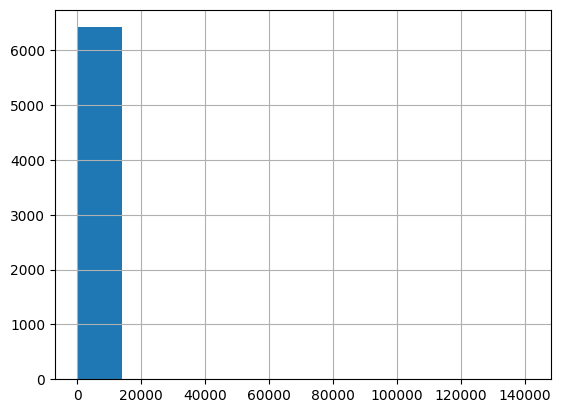

In [7]:
# This is not a good histogram, you'll lose marks if you show this
taxis['total_per_hour'].hist()
# hint: bins, log xaxis 

In [8]:
taxis['pickup']

0      2019-03-23 20:21:09
1      2019-03-04 16:11:55
2      2019-03-27 17:53:01
3      2019-03-10 01:23:59
4      2019-03-30 13:27:42
               ...        
6428   2019-03-31 09:51:53
6429   2019-03-31 17:38:00
6430   2019-03-23 22:55:18
6431   2019-03-04 10:09:25
6432   2019-03-13 19:31:22
Name: pickup, Length: 6433, dtype: datetime64[ns]

In [9]:
pd.to_datetime(taxis['pickup'].dt.date)

0      2019-03-23
1      2019-03-04
2      2019-03-27
3      2019-03-10
4      2019-03-30
          ...    
6428   2019-03-31
6429   2019-03-31
6430   2019-03-23
6431   2019-03-04
6432   2019-03-13
Name: pickup, Length: 6433, dtype: datetime64[ns]

In [10]:
taxis['duration'] = (taxis['dropoff'] - taxis['pickup']).dt.total_seconds()/3600

In [11]:
import numpy as np

In [12]:
taxis.loc[3241]

pickup             2019-03-24 17:19:27
dropoff            2019-03-24 17:19:29
passengers                           1
distance                          0.34
fare                              65.0
tip                              13.06
tolls                              0.0
total                            78.36
color                           yellow
payment                    credit card
pickup_zone                Kew Gardens
dropoff_zone                       NaN
pickup_borough                  Queens
dropoff_borough                    NaN
duration                      0.000556
total_per_hour                141048.0
Name: 3241, dtype: object

In [13]:
(taxis['total']/taxis['duration']).replace(np.inf,np.nan).dropna().sort_values()

6416        17.849082
2356        22.158391
1501        22.718447
6321        23.902439
5817        25.467312
            ...      
6314     30000.000000
622      31452.631579
970      36216.000000
42      120456.000000
3241    141048.000000
Length: 6427, dtype: float64

In [14]:
# - on a flat table
# select *
# From taxis 
# where total > 10

In [15]:
# # Tell me the sum total for each pickup_borough



# select pickup_borough , sum(total) as sum_total
# From taxis 
# group by pickup_borough
# having sum_total > 10


In [16]:
'credit card'.split(' ')

['credit', 'card']

In [17]:
# This power of pandas accessory objects
taxis['payment'].str.split(' ')

0       [credit, card]
1               [cash]
2       [credit, card]
3       [credit, card]
4       [credit, card]
             ...      
6428    [credit, card]
6429    [credit, card]
6430            [cash]
6431    [credit, card]
6432    [credit, card]
Name: payment, Length: 6433, dtype: object

In [18]:
taxis.groupby(['pickup_borough']).agg(
    {'total':'max'}
)


,total
pickup_borough,
Bronx,82.36
Brooklyn,94.80
Manhattan,136.56
Queens,174.82


In [19]:
'credit card'.split(' ')

['credit', 'card']

In [20]:
taxis['payment'].str

In [21]:
# Method 1: Using accessor 
taxis['payment'].str.split(' ')

0       [credit, card]
1               [cash]
2       [credit, card]
3       [credit, card]
4       [credit, card]
             ...      
6428    [credit, card]
6429    [credit, card]
6430            [cash]
6431    [credit, card]
6432    [credit, card]
Name: payment, Length: 6433, dtype: object

In [22]:
def func(x):
    return x +1

In [23]:
#  lambda inputvar : returned_obj
lambda x : x + 1

<function __main__.<lambda>(x)>

In [24]:
payments_split = []

# EDGE CASE

# Tuple unpacking
for index, row in taxis.iterrows():
    payment = row.payment
    if pd.isna(payment):
        p_split = np.nan
    else:
        p_split = payment.split(' ')
        
    payments_split.append(p_split)


In [25]:
taxis['payments_split'] = payments_split
taxis['payments_split']

0       [credit, card]
1               [cash]
2       [credit, card]
3       [credit, card]
4       [credit, card]
             ...      
6428    [credit, card]
6429    [credit, card]
6430            [cash]
6431    [credit, card]
6432    [credit, card]
Name: payments_split, Length: 6433, dtype: object

In [26]:
# Method 3: 
taxis['payment'].apply( lambda x :  np.nan if pd.isna(x) else  x.split(' '))  

0       [credit, card]
1               [cash]
2       [credit, card]
3       [credit, card]
4       [credit, card]
             ...      
6428    [credit, card]
6429    [credit, card]
6430            [cash]
6431    [credit, card]
6432    [credit, card]
Name: payment, Length: 6433, dtype: object

In [27]:
# For each color, return sum total
# I will remove marks if you do this:
taxis.groupby('color')['total'].sum()

color
green      16186.91
yellow    102938.06
Name: total, dtype: float64

In [28]:
# This method is ok
taxis.groupby('color').agg(
    {'total':'sum'}
)


,total
color,
green,16186.91
yellow,102938.06


In [29]:
# This method is ok
taxis.groupby(['color','pickup_borough']).agg(
    total_sum = ('total','sum')
)


total_sum
color  pickup_borough           
green  Bronx             1834.04
       Brooklyn          5820.25
       Manhattan         3931.76
       Queens            4572.56
yellow Bronx              419.72
       Brooklyn          1547.23
       Manhattan        83888.47
       Queens           16228.13

In [30]:
# This method is ok
taxis.pivot_table(values='total',index='color', aggfunc='sum')

,total
color,
green,16186.91
yellow,102938.06


In [31]:
# This method is ok
taxis.pivot_table(
    values='total',
    index='color', 
    columns = 'pickup_borough',
    aggfunc=['sum']
)

sum                             
pickup_borough    Bronx Brooklyn Manhattan    Queens
color                                               
green           1834.04  5820.25   3931.76   4572.56
yellow           419.72  1547.23  83888.47  16228.13

In [32]:
# This method is ok
taxis.pivot_table(
    values='total',
    columns='color', 
    aggfunc='sum'
)

color,green,yellow
total,16186.91,102938.06


In [33]:
# Cutesy
taxis['pickup'].dt.year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
6428    2019
6429    2019
6430    2019
6431    2019
6432    2019
Name: pickup, Length: 6433, dtype: int32

In [34]:
taxis['date'] =  pd.to_datetime(taxis['pickup'].dt.date)

In [271]:
FREQ = 'D'
daily_resampled = taxis.set_index('date').resample(FREQ).agg(
        {'total':'sum'}
)

<Axes: xlabel='date'>

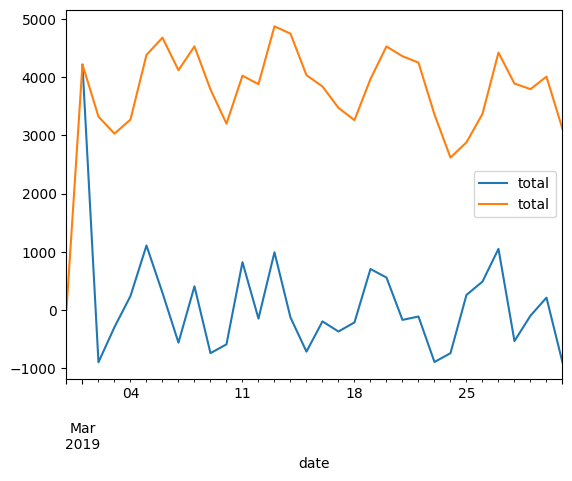

In [272]:
fig, ax = plt.subplots()
daily_resampled.diff().plot(ax=ax)
daily_resampled.plot(ax=ax)

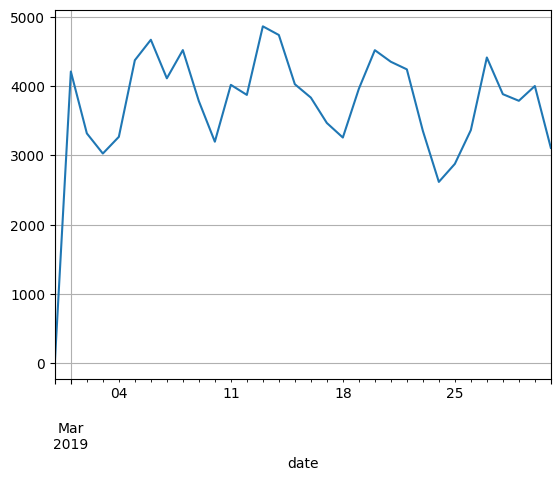

In [273]:
fig, ax = plt.subplots()
daily_resampled['total'].plot()
plt.grid(True)

In [274]:
daily_resampled['total'].autocorr(lag = 0)

1.0

In [239]:
[
    (l,daily_resampled['total'].autocorr(lag = l)) 
    for l in range(15)
]


[(0, 1.0),
 (1, 0.20653551659617914),
 (2, 0.07954604313527525),
 (3, -0.0736141971661062),
 (4, -0.22029729386577557),
 (5, -0.18367873209831348),
 (6, 0.011100303502367464),
 (7, 0.32918170014495735),
 (8, 0.09554145227151858),
 (9, -0.07330673095840773),
 (10, -0.15130615919950277),
 (11, -0.44746931127472606),
 (12, -0.2069875578552961),
 (13, -0.23011543231217574),
 (14, -0.028342794853570708)]

# Regression Model

In [308]:
daily_resampled.reset_index()['date'].values.reshape?

Object `values.reshape` not found.


In [334]:
y = daily_resampled['total'].values

In [423]:
# Method 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_all_dates = pd.date_range(
    '2019-02-28', 
    freq='D',
    periods=15+len(X_dates) # Here you see I am encoding my train and OOS
).values.reshape(-1,1)

le.fit(X_all_dates)

X_all = le.transform(X_all_dates).reshape(-1,1)

/Users/bipinaasi/aidi-1100/venv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bipinaasi/aidi-1100/venv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [424]:
X.shape

(32, 1)

In [403]:
# DO NOT HARD CODE LIKE THIS! YOU WILL LOSE MARKS
OOS_dates = pd.date_range('2019-03-31', freq='D', periods=15).values.reshape(-1,1)

In [375]:
# THIS IS BAD! DON'T DO THIS
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# X_OOS = le.fit_transform(OOS_dates).reshape(-1,1)

In [421]:
# Method 2
X_dates = daily_resampled.reset_index()['date'].values.reshape(-1,1)

X = np.array([i for i in range(len(X_dates))]).reshape(-1,1)

In [466]:
from sklearn import linear_model
mdl_ridge = linear_model.Ridge(alpha=.5)


In [462]:
from sklearn.linear_model import LogisticRegression

In [471]:
mdl_las = linear_model.Lasso(alpha=0.1)
mdl_las.fit(X,y)
mdl_las.predict(X_all)

array([3540.50755682, 3552.25902493, 3564.01049304, 3575.76196114,
       3587.51342925, 3599.26489736, 3611.01636547, 3622.76783358,
       3634.51930169, 3646.27076979, 3658.0222379 , 3669.77370601,
       3681.52517412, 3693.27664223, 3705.02811034, 3716.77957845,
       3728.53104655, 3740.28251466, 3752.03398277, 3763.78545088,
       3775.53691899, 3787.2883871 , 3799.03985521, 3810.79132331,
       3822.54279142, 3834.29425953, 3846.04572764, 3857.79719575,
       3869.54866386, 3881.30013196, 3893.05160007, 3904.80306818,
       3916.55453629, 3928.3060044 , 3940.05747251, 3951.80894062,
       3963.56040872, 3975.31187683, 3987.06334494, 3998.81481305,
       4010.56628116, 4022.31774927, 4034.06921738, 4045.82068548,
       4057.57215359, 4069.3236217 , 4081.07508981])

In [469]:
mdl_ridge.fit(X,y)
mdl_ridge.predict(X_all)

array([3540.52275707, 3552.27324451, 3564.02373196, 3575.77421941,
       3587.52470686, 3599.2751943 , 3611.02568175, 3622.7761692 ,
       3634.52665665, 3646.27714409, 3658.02763154, 3669.77811899,
       3681.52860643, 3693.27909388, 3705.02958133, 3716.78006878,
       3728.53055622, 3740.28104367, 3752.03153112, 3763.78201857,
       3775.53250601, 3787.28299346, 3799.03348091, 3810.78396835,
       3822.5344558 , 3834.28494325, 3846.0354307 , 3857.78591814,
       3869.53640559, 3881.28689304, 3893.03738049, 3904.78786793,
       3916.53835538, 3928.28884283, 3940.03933028, 3951.78981772,
       3963.54030517, 3975.29079262, 3987.04128006, 3998.79176751,
       4010.54225496, 4022.29274241, 4034.04322985, 4045.7937173 ,
       4057.54420475, 4069.2946922 , 4081.04517964])

In [422]:
mdl = LinearRegression()

# I AM NOT FITTING ON ALL
mdl.fit(X,y)

LinearRegression()

In [410]:
predictions_all = pd.DataFrame([mdl.predict(X_all)]).T
predictions_all.columns = ['all_predictions']

In [417]:
predictions_all.index = X_all_dates.flatten()

<Axes: xlabel='date'>

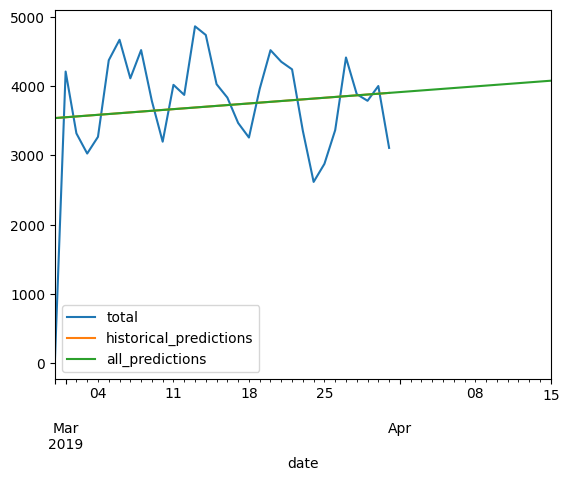

In [419]:
fig, ax = plt.subplots()
daily_resampled.plot(ax=ax)
predictions_all.plot(ax=ax)

In [384]:
daily_resampled.index[-1]

Timestamp('2019-03-31 00:00:00')

### Regression Lessons: 
- np.array
- reshape
- encoding our dates to integers (DO NOT HARD CODE DATES)
    - Method 1: Use Label Encoder (cons to this method)
        - Con: Only fits/transforms on what it sees. (i.e when you transform datapoints that the encoder hasn't seen. It shall error
    - Method 2: Just use range manually.
- When making X_OOS, we can't start at 0. Had to continue from X_train.
- Ensure our prediction dataframe's index was a datetime obj
- Make sure your model is only fit with train X

In [431]:
daily_resampled['l1error'] = daily_resampled['total'] - daily_resampled['historical_predictions']

## Residual Plot

<Axes: xlabel='historical_predictions', ylabel='l1error'>

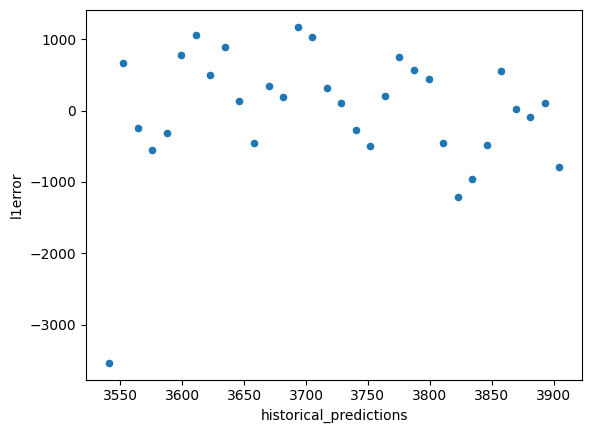

In [435]:
daily_resampled.plot.scatter(
    x='historical_predictions',
    y='l1error'
)

**As you can see, a numerical correlation values doesn't always represent the distribution!**

You shouldn't solely rely on the numerical value, and you should pair your EDA's with visualizations 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/2880px-Anscombe%27s_quartet_3.svg.png" alt="Alt Text" width="1000">



In [263]:
X = np.array([i for i in range(len(daily_resampled))]).reshape(-1, 1)
X.shape

(32, 1)

In [265]:
taxis.iloc[5].values

array([Timestamp('2019-03-11 10:37:23'), Timestamp('2019-03-11 10:47:31'),
       1, 0.49, 7.5, 2.16, 0.0, 12.96, 'yellow', 'credit card',
       'Times Sq/Theatre District', 'Midtown East', 'Manhattan',
       'Manhattan', 0.1688888888888889, 76.73684210526316,
       list(['credit', 'card']), Timestamp('2019-03-11 00:00:00')],
      dtype=object)

In [254]:
y = daily_resampled['total'].values

In [150]:
historical_predictions = model.predict(X)

In [267]:
daily_resampled['historical_predictions'] = historical_predictions

In [37]:
from sklearn.linear_model import LinearRegression

In [39]:
lr_model = LinearRegression()

In [40]:
daily_resampled['total'].values

array([   6.3 , 4213.83, 3319.02, 3027.32, 3269.08, 4377.38, 4673.61,
       4115.7 , 4524.21, 3785.8 , 3198.69, 4021.26, 3875.8 , 4868.06,
       4742.55, 4030.29, 3836.58, 3469.5 , 3258.78, 3963.92, 4522.95,
       4355.08, 4245.36, 3355.98, 2616.81, 2877.55, 3366.2 , 4417.17,
       3886.44, 3790.52, 4004.39, 3108.84])

In [41]:
X = np.array([i for i in range(len(daily_resampled))])

In [269]:
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=15, freq='D')
future_date_ints = np.array(
    [i for i in range(len())]
).reshape(-1, 1)
future_date_ints

array([[32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46]])

In [45]:
# The model expects a 2D set of features (2D vector)
X_OOS.reshape(-1,1).shape

(15, 1)

In [46]:
lr_model.fit(y = daily_resampled['total'].values, X=X.reshape(-1, 1) )

LinearRegression()

In [48]:
preds = lr_model.predict(X_OOS.reshape(-1,1))

In [57]:
start_date = daily_resampled.index[-1] + datetime.timedelta(days=1)

#### Notes on PDF vs Histogram
- Continuous vs Discrete
- PDF sum probability = 1 (density)

/Users/bipinaasi/aidi-1100/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total', ylabel='Density'>

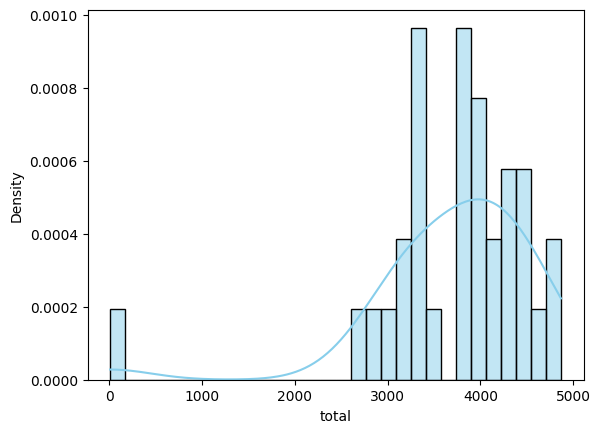

In [439]:
sns.histplot(
    daily_resampled['total'], 
    bins=30,
    kde=True, # Makes it continuous
    stat='density', # This normalizes it such that total probability = 1
    color='skyblue',
)

In [382]:
daily_grouped = taxis.groupby('date').agg(
    {'total':'sum'}
)

In [224]:
daily_grouped['total'].autocorr(lag = 1)

NameError: name 'daily_grouped' is not defined

In [384]:
for lag in range(30):
    print(lag, abs(daily_grouped['total'].autocorr(lag = lag)))

0 1.0
1 0.20653551659617914
2 0.07954604313527525
3 0.0736141971661062
4 0.22029729386577557
5 0.18367873209831348
6 0.011100303502367464
7 0.32918170014495735
8 0.09554145227151858
9 0.07330673095840773
10 0.15130615919950277
11 0.44746931127472606
12 0.2069875578552961
13 0.23011543231217574
14 0.028342794853570708
15 0.09277378679222613
16 0.046387447259917516
17 0.20224224519742665
18 0.18787258285354097
19 0.2364198312767814
20 0.33834681227205043
21 0.014231302004383927
22 0.05489211283356779
23 0.06392153702756523
24 0.4298423236083816
25 0.3657911715760811
26 0.3217054236786084
27 0.6158097171650437
28 0.16817070846860996
29 0.08955064285013344


<Axes: xlabel='date'>

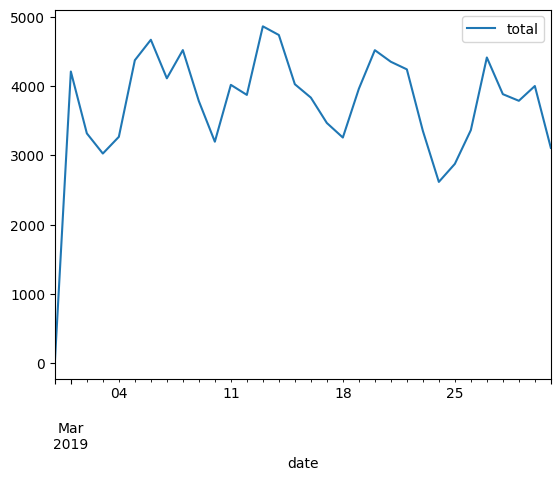

In [385]:
# Reference stationarity and Seasonaility
daily_grouped.plot()

In [386]:
taxis['dropoff'] -  taxis['pickup']

0      0 days 00:06:15
1      0 days 00:07:05
2      0 days 00:07:24
3      0 days 00:25:52
4      0 days 00:09:32
             ...      
6428   0 days 00:03:34
6429   0 days 00:56:23
6430   0 days 00:19:07
6431   0 days 00:05:04
6432   0 days 00:16:40
Length: 6433, dtype: timedelta64[ns]

In [387]:
taxis['duration_hours'] = ((taxis['dropoff'] -  taxis['pickup']).dt.total_seconds()/3600)

In [388]:
time_series = taxis.set_index('date').resample('D').agg(
    daily_sum = ('total', 'sum')
)

In [389]:
time_series['daily_sum'].autocorr(lag = 7)

0.32918170014495735

In [390]:
time_series['daily_sum'].autocorr(lag=2)

0.07954604313527525

In [391]:
time_series['daily_sum'].autocorr(lag=10)

-0.15130615919950277

In [392]:
time_series.reset_index().diff()['date'].value_counts()

date
1 days    31
Name: count, dtype: int64

/Users/bipinaasi/aidi-1100/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration', ylabel='Density'>

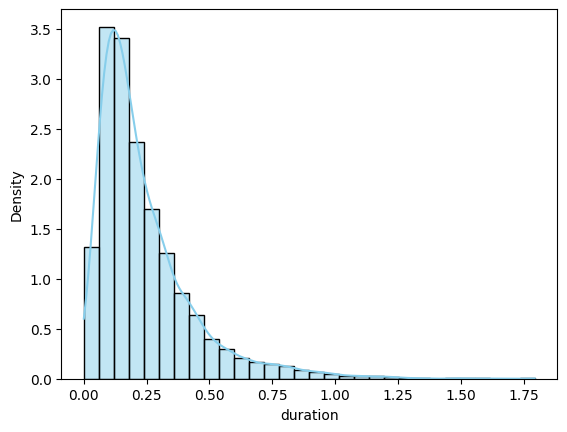

In [394]:
sns.histplot(taxis['duration'], bins=30, kde=True, stat='density', color='skyblue')


Histogram: A graphical representation of data that shows the frequency of data points falling into certain intervals (bins). It represents counts or frequencies directly.

PDF: A continuous function that describes the likelihood of data points taking on any value in the distribution. For continuous data, the PDF shows the density, not direct probabilities.


In [176]:
import matplotlib.pyplot as plt
import seaborn as sns


In [185]:
np.arange(1, n+1)

array([   1,    2,    3, ..., 6431, 6432, 6433])

In [187]:
# MinMax scaler. normalize to 0 to 1
np.arange(1, n+1)/ n

array([1.55448469e-04, 3.10896938e-04, 4.66345406e-04, ...,
       9.99689103e-01, 9.99844552e-01, 1.00000000e+00])

In [ ]:
cdf = np.arange(1, n+1) / n

In [214]:
lower_lim = taxis['duration'].quantile(0.1)
lower_lim

0.0675

In [215]:
upper_lim = taxis['duration'].quantile(0.90)
upper_lim

0.47794444444444456

In [218]:
m = (taxis['duration'] < upper_lim) & (taxis['duration'] > lower_lim)

taxis[m].shape

(5141, 18)

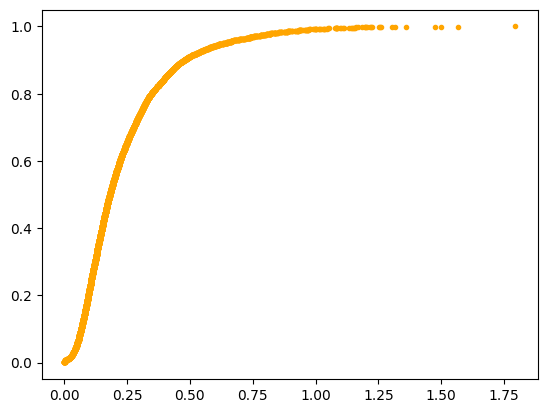

In [440]:
# METHOD 1:
# Sort trip durations for CDF calculation

sorted_durations = np.sort(taxis['duration'])
n = len(sorted_durations)

# Plot the CDF
plt.plot(sorted_durations, cdf, marker='.', linestyle='none', color='orange')

In [ ]:
# METHOD 2
seaborn.ecdfplot

In [181]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

<Axes: >

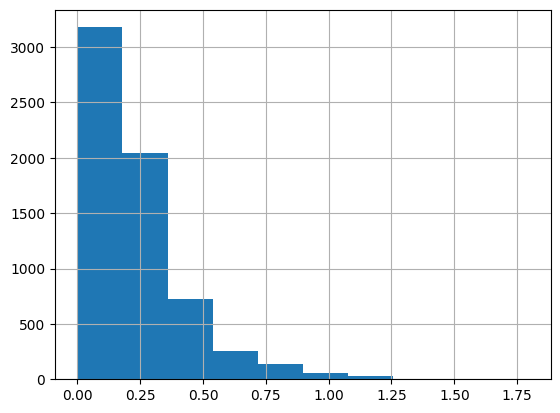

In [180]:
taxis['duration'].hist()

In [ ]:
cdf = np.arange(1, n+1) / n
